<a href="https://colab.research.google.com/github/Glaudemias/BOOTCAMP---Data_Science---Alura/blob/main/M%C3%B3dulos/M%C3%B3dulo2/Aulas%26Desafios/Bootcamp_Datascience_MODULO_2_Aulas%26Desafios_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from io import StringIO


In [ ]:
dados_mais_recente = pd.read_csv('/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /Módulo 2/A084054189_28_143_208_MODIFICADA_VALOR_TOTAL.csv', sep=';', skiprows=3,skipfooter=12,thousands='.' ,decimal=',', encoding='ISO-8859-1')
dados_mais_recente.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13534657.88,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32

In [ ]:
pd.options.display.float_format ='{:.2f}'.format

In [ ]:
#Ordenadno por Total
dados_mais_recente = dados_mais_recente.sort_values('Total',ascending=False)

#definindo colunas usaveis
colunas_usaveis = dados_mais_recente.mean().index.tolist()
colunas_usaveis.insert(0,'Unidade da Federação')
colunas_usaveis

#Retirando os valores vazios e a coluna Total e indexando por Estado
dados_mais_recente = dados_mais_recente[colunas_usaveis]
dados_mais_recente.set_index('Unidade da Federação',inplace=True)
colunas_NOREG = dados_mais_recente.columns[0:-1]
dados_mais_recente = dados_mais_recente[colunas_NOREG]/1000000
dados_mais_recente.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,167.99,191.86,182.80,186.86,212.78,203.19,217.04,217.20,220.76,232.54,221.99,220.12,209.09,214.57,203.12,227.25,231.54,230.19,226.02,229.66,234.53,233.45,221.13,239.79,236.93,227.53,231.06,241.95,236.44,244.46,...,280.08,279.20,269.52,286.78,289.71,293.10,287.92,291.52,298.70,282.74,295.67,283.95,283.18,298.18,279.43,288.82,297.83,303.89,293.59,305.03,313.87,298.55,310.85,292.85,284.75,304.51,288.87,297.36,251.33,272.49,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
31 Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,78.33,86.92,91.37,90.15,95.29,94.09,99.08,96.19,102.75,100.08,97.96,100.73,95.35,99.02,91.52,101.60,102.02,103.35,102.49,104.43,104.33,102.06,102.30,104.62,106.03,102.85,103.10,107.15,109.40,110.96,...,142.85,143.16,136.71,149.83,149.89,151.55,151.51,156.68,154.28,153.87,151.23,144.87,146.72,154.07,147.97,153.46,156.78,162.96,154.83,166.21,164.29,156.57,165.12,153.01,153.90,159.28,150.24,142.90,133.42,133.51,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
41 Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,53.12,63.91,64.52,60.78,65.63,64.76,65.90,66.28,69.16,68.26,66.39,66.40,67.07,65.49,62.24,70.70,70.37,72.06,71.94,72.37,74.71,72.79,72.85,75.60,74.37,75.11,72.13,73.76,76.60,75.66,...,115.17,118.80,110.31,116.63,120.06,121.36,122.17,124.61,127.87,123.93,125.32,125.32,117.53,122.46,119.84,123.29,120.18,126.48,125.53,125.98,126.17,126.97,131.59,127.10,117.91,122.36,127.01,117.32,94.60,107.51,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
43 Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,53.70,58.73,57.63,58.78,63.37,62.20,61.68,62.50,64.61,66.46,65.78,63.71,64.49,66.30,61.53,62.49,66.81,67.90,64.80,68.52,68.73,66.17,66.89,67.46,67.10,60.75,58.88,66.21,61.55,67.01,...,82.93,88.82,80.57,87.42,89.40,88.15,90.75,89.09,94.01,93.66,90.03,93.08,89.05,89.66,89.26,85.59,95.15,94.16,92.24,102.30,100.26,95.92,102.33,93.97,90.78,94.91,91.44,102.88,83.00,82.38,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
33 Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,39.91,50.58,46.20,47.09,50.81,49.19,54.04,50.72,55.05,56.20,52.06,54.30,49.77,47.25,50.66,56.12,52.07,59.40,56.87,59.81,60.27,56.85,56.97,56.23,55.77,54.47,54.49,57.19,57.53,59.42,...,71.18,72.53,70.91,75.60,76.00,78.03,77.68,83.73,80.45,77.38,79.40,75.08,71.29,80.14,73.54,76.15,75.85,86.64,80.13,89.92,85.72,82.97,86.39,80.84,78.58,83.19,76.12,77.00,71.40,85.12,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84


In [ ]:
mês_recente=dados_mais_recente.columns[-1]
gastos_do_mes_recente = dados_mais_recente[mês_recente]/1000000


In [ ]:
gastos_do_mes_recente


Unidade da Federação
35 São Paulo             0.00
31 Minas Gerais          0.00
41 Paraná                0.00
43 Rio Grande do Sul     0.00
33 Rio de Janeiro        0.00
29 Bahia                 0.00
26 Pernambuco            0.00
42 Santa Catarina        0.00
23 Ceará                 0.00
52 Goiás                 0.00
15 Pará                  0.00
21 Maranhão              0.00
32 Espírito Santo        0.00
24 Rio Grande do Norte   0.00
25 Paraíba               0.00
53 Distrito Federal      0.00
50 Mato Grosso do Sul    0.00
22 Piauí                 0.00
27 Alagoas               0.00
51 Mato Grosso           0.00
13 Amazonas              0.00
28 Sergipe               0.00
17 Tocantins             0.00
11 Rondônia              0.00
12 Acre                  0.00
14 Roraima               0.00
16 Amapá                 0.00
Name: 2021/Mar, dtype: float64

In [ ]:
gastos_proporcionais =gastos_do_mes_recente/ gastos_do_mes_recente.sum()
gastos_proporcionais = gastos_proporcionais*100

# **AULA 1** 

Gastos do mês

Aqui temos dados que são equivalentes, mas que utilizam valores absoluto.



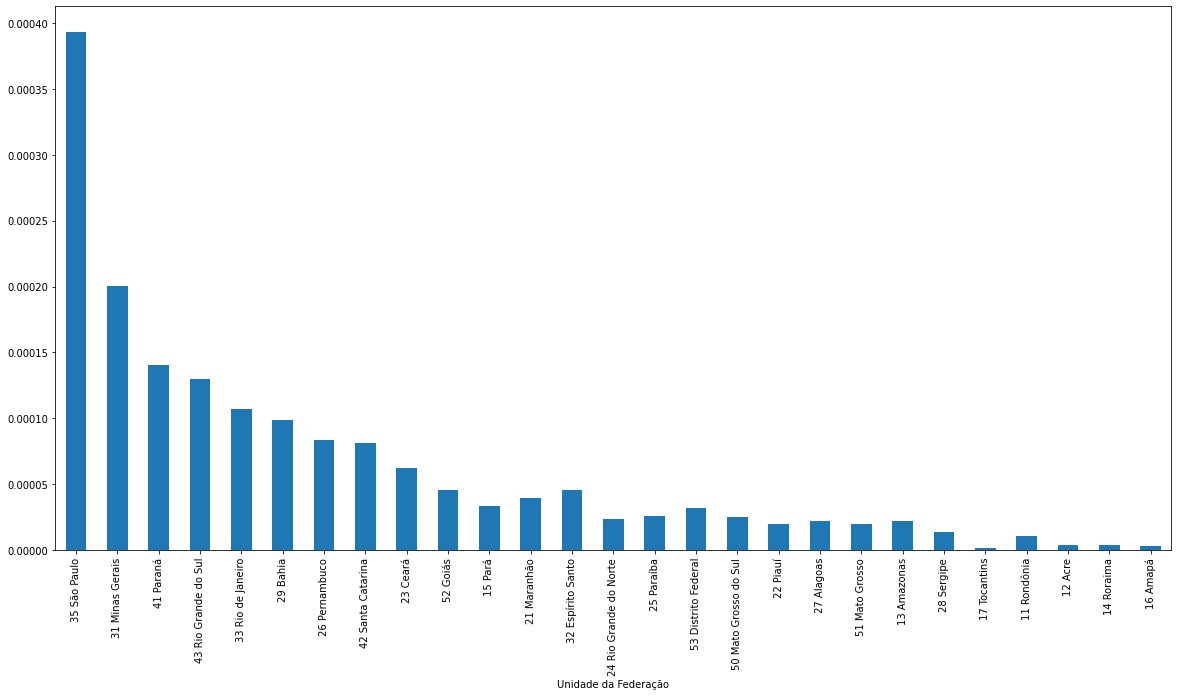

In [ ]:
gastos_do_mes_recente.plot(kind='bar', figsize=(20,10))

O valor absoluto ele é interessante, mas ele desconsidera totalmente os valores relativos e é importante sempre analisar dois valores relativos a alguma coisa. 

Por exemplo quanto é o gasto proporcional desse valor para o Brasil inteiro ?

Gastos proporcionais

In [ ]:
gastos_do_mes_recente.head()

Unidade da Federação
35 São Paulo           0.00
31 Minas Gerais        0.00
41 Paraná              0.00
43 Rio Grande do Sul   0.00
33 Rio de Janeiro      0.00
Name: 2021/Mar, dtype: float64

se somarmos esses valores podemos encontrar o valor total (BRASIL) 

In [ ]:
gastos_do_mes_recente.sum()

0.00168756213838

Para calcular a proporcionalidade, basta dividir o gasto do mes recente pelo valor acima.

Dessa forma:

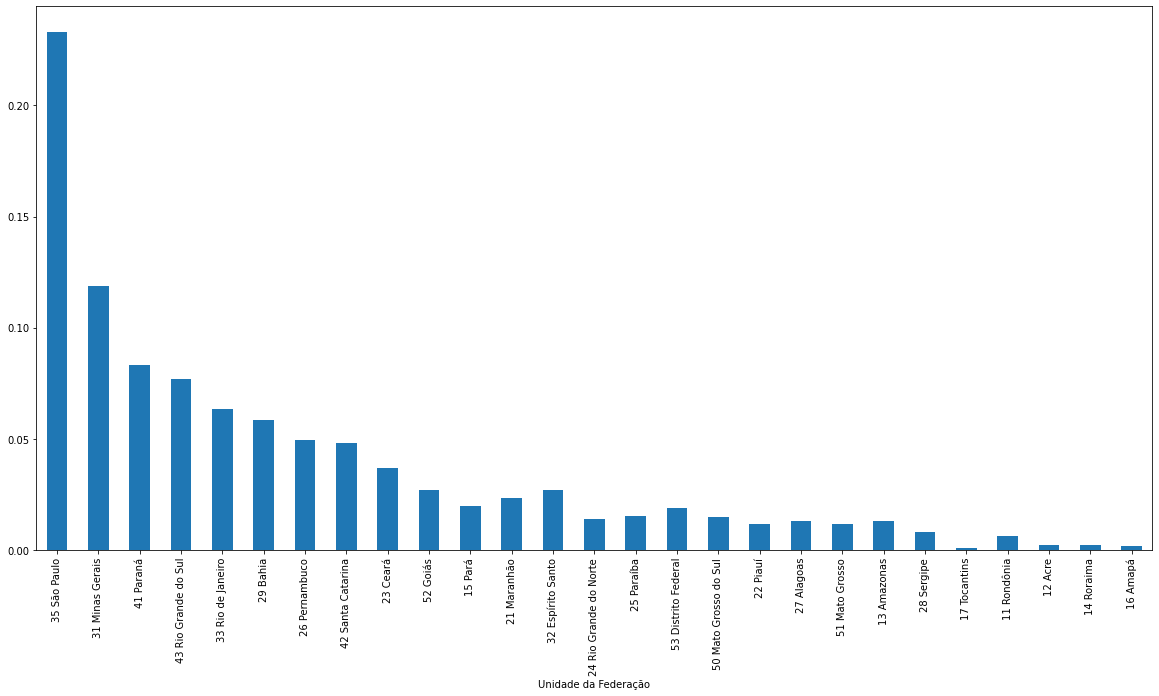

In [ ]:
gastos_proporcionais = gastos_do_mes_recente / gastos_do_mes_recente.sum()
gastos_proporcionais.plot(kind='bar', figsize=(20,10))

Aqui esses dados são realtivos  aos gastos do Brasil

* Agora sabemos que São Paulo tem 26% de gastos em relação ao pais

* Paraná aproximadamente 12%

Carregando a população de cada um desses lugares

In [ ]:
dados_pop = 'https://github.com/alura-cursos/agendamento-hospitalar/blob/main/dados/estimativa_dou_2020.xls?raw=true'
pop_ibge_estimativa = pd.read_excel(dados_pop)
pop_ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,nan,POPULAÇÃO ESTIMADA
1,Brasil,nan,211755692
2,Região Norte,nan,18672591
3,Rondônia,nan,1796460
4,Acre,nan,894470


WIKIPEDIA ESTIMATIVA

In [ ]:
dados_da_populacao = """
Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)
"""
#fonte:https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [ ]:
from io import StringIO

dados_da_populacao_IO = StringIO(dados_da_populacao)

tabela_wiki = pd.read_csv(dados_da_populacao_IO, sep='\t')
tabela_wiki =tabela_wiki.dropna()
tabela_wiki.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [ ]:
tabela_wiki.drop(['País comparável','% da pop. total','Posição'],axis=1, inplace=True)

In [ ]:
mapa={'Unidade federativa':'uf', 'População':'populacao'}

In [ ]:
tabela_wiki = tabela_wiki.rename(columns=mapa)
tabela_wiki.head()

,uf,populacao
1,São Paulo,46 289 333
2,Minas Gerais,21 292 666
3,Rio de Janeiro,17 366 189
4,Bahia Bahia,14 930 634
5,Paraná,11 516 840


In [ ]:
tabela_wiki.dtypes

uf           object
populacao    object
dtype: object

In [ ]:
tabela_wiki['populacao'] = tabela_wiki['populacao'].str.replace(" ","").astype(int) #transformando para funções de string
tabela_wiki.head()

,uf,populacao
1,São Paulo,46289333
2,Minas Gerais,21292666
3,Rio de Janeiro,17366189
4,Bahia Bahia,14930634
5,Paraná,11516840


Utilizando o método string, posso por exemplo:

* Conseguir as três primeiras letras de cada linha do meu dataframe

In [ ]:
tabela_wiki['uf'].str[:3]

1      Sã
2      Mi
3      Ri
4     Bah
5      Pa
6      Ri
7      Pe
8      Ce
9     Par
10     Sa
11     Ma
12     Go
13     Am
14     Es
15     Pa
16     Ri
17     Ma
18     Al
19     Pi
20     Di
21     Ma
22     Se
23     Ro
24     To
25     Ac
26     Am
27     Ro
Name: uf, dtype: object

In [ ]:
tabela_wiki.dtypes

uf           object
populacao     int64
dtype: object

In [ ]:
tabela_wiki.set_index('uf',inplace=True)
tabela_wiki.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Manipulação e junção de tabelas

In [ ]:
tabela_wiki.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


usando o display para mostrar varias operações de uma celula

In [ ]:
print('Mostrando a Tabela: \n'.upper())
display(tabela_wiki.head())

print('----------------------------------------------')

print('Mostrando as informações da Tabela: \n'.upper())
display(tabela_wiki.info())

MOSTRANDO A TABELA: 



,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


----------------------------------------------
MOSTRANDO AS INFORMAÇÕES DA TABELA: 

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

Agora cruzando os dados dos gastos_do_mais_recente com a tabela_wiki

In [ ]:
display(gastos_do_mes_recente.head()) 

display(tabela_wiki.head())

Unidade da Federação
35 São Paulo           0.00
31 Minas Gerais        0.00
41 Paraná              0.00
43 Rio Grande do Sul   0.00
33 Rio de Janeiro      0.00
Name: 2021/Mar, dtype: float64

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia Bahia,14930634
Paraná,11516840


Se observar os dois data frames possuem um mesmo indice, com os mesmos valores, atráves do join podemos uni-los 

In [ ]:
tabela_wiki.join(gastos_do_mes_recente)

,populacao,2021/Mar
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


Todos os dados vinheram como nan (not a number), por que isso aconteceu:

1. Perceba que nos gastos_mais_recente diferente da tabela_wiki, são paulo está como  `35 São Paulo`, esse `35 `acaba dando um erro, atraves do meto string podemos retira-lo

In [ ]:
gastos_do_mes_recente.index=gastos_do_mes_recente.index.str[3:]
gastos_do_mes_recente

Unidade da Federação
São Paulo             0.00
Minas Gerais          0.00
Paraná                0.00
Rio Grande do Sul     0.00
Rio de Janeiro        0.00
Bahia                 0.00
Pernambuco            0.00
Santa Catarina        0.00
Ceará                 0.00
Goiás                 0.00
Pará                  0.00
Maranhão              0.00
Espírito Santo        0.00
Rio Grande do Norte   0.00
Paraíba               0.00
Distrito Federal      0.00
Mato Grosso do Sul    0.00
Piauí                 0.00
Alagoas               0.00
Mato Grosso           0.00
Amazonas              0.00
Sergipe               0.00
Tocantins             0.00
Rondônia              0.00
Acre                  0.00
Roraima               0.00
Amapá                 0.00
Name: 2021/Mar, dtype: float64

conseguimos retirar os números 

vamos tentar novamente o joint

In [ ]:
gastos_e_populacao_recente = tabela_wiki.join(gastos_do_mes_recente)
gastos_e_populacao_recente

,populacao,2021/Mar
uf,,
São Paulo,46289333,nan
Minas Gerais,21292666,nan
Rio de Janeiro,17366189,nan
Bahia Bahia,14930634,nan
Paraná,11516840,nan
Rio Grande do Sul,11422973,nan
Pernambuco,9616621,nan
Ceará,9187103,nan
Pará Pará,8690745,nan


Tomar cuidado com os espaços vazios entre as palavras eles podem ser um indicativo de que está dando o erro mesmo as palavras estando iguais exempo:


df1 = 'SÃO PAULO'

df2 = ' SÃO PAULO'

perceba que no df2 existe um espaço entre a primeira letra da palavra e o hifen, isso ja torna tudo errado

Lembre de usar o método strip()


---



---



O que aprendemos nessa aula:

* Como comparar os gastos em relação a determinado estado;
* Como fazer a leitura de dados no formato Excel com Pandas;
* Como tornar uma string em (com formato de tabela) legível em pandas usando o String.IO;
* Como usar Join em Pandas.

## Aula 1 - Desafio 1

Desafio: ler o arquivo direto da sua wikipedia

In [ ]:
tabela_wiki = pd.read_html(io='https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1')
tabela_wiki = tabela_wiki[0]
tabela_wiki

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


In [ ]:
url= 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

#Requisitando a tabela e guardando em uma variavel 
response= requests.get(url)

#BeautifulSoup
soup = BeautifulSoup(response.text,'html.parser')
#importando a tabela
populacao_table = soup.find('table',{'class':'wikitable'})

In [ ]:
#Lendo a tabela com o pandas
populacao = pd.read_html(str(populacao_table))

#criando o Dataframe
populacao = pd.DataFrame(populacao[0])

In [ ]:
populacao.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


## Aula 1 - Desafio 2



Desafio: Limpando os dados do wikipedia

In [ ]:
populacao.drop(['País comparável (habitantes)','% da pop. total','Posição'],axis=1, inplace=True)

In [ ]:
mapa={'Unidade federativa':'uf', 'População':'populacao'}
populacao = populacao.rename(columns=mapa)
populacao.head()

,uf,populacao
0,São Paulo,46 289 333
1,Minas Gerais,21 292 666
2,Rio de Janeiro,17 366 189
3,Bahia,14 930 634
4,Paraná,11 516 840


In [ ]:
populacao.set_index('uf', inplace=True)

In [ ]:
populacao.head()

,populacao
uf,
São Paulo,46 289 333
Minas Gerais,21 292 666
Rio de Janeiro,17 366 189
Bahia,14 930 634
Paraná,11 516 840


Adequando o tipo da coluna população

In [ ]:
populacao.dtypes

populacao    object
dtype: object

In [ ]:
populacao['populacao'] = populacao['populacao'].str.replace(' ','').astype(int)

In [ ]:
populacao.dtypes

populacao    int64
dtype: object

In [ ]:
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


In [ ]:
dados_mais_recente.index=dados_mais_recente.index.str[3:]


In [ ]:
dados_mais_recente

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,167.99,191.86,182.80,186.86,212.78,203.19,217.04,217.20,220.76,232.54,221.99,220.12,209.09,214.57,203.12,227.25,231.54,230.19,226.02,229.66,234.53,233.45,221.13,239.79,236.93,227.53,231.06,241.95,236.44,244.46,...,280.08,279.20,269.52,286.78,289.71,293.10,287.92,291.52,298.70,282.74,295.67,283.95,283.18,298.18,279.43,288.82,297.83,303.89,293.59,305.03,313.87,298.55,310.85,292.85,284.75,304.51,288.87,297.36,251.33,272.49,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,78.33,86.92,91.37,90.15,95.29,94.09,99.08,96.19,102.75,100.08,97.96,100.73,95.35,99.02,91.52,101.60,102.02,103.35,102.49,104.43,104.33,102.06,102.30,104.62,106.03,102.85,103.10,107.15,109.40,110.96,...,142.85,143.16,136.71,149.83,149.89,151.55,151.51,156.68,154.28,153.87,151.23,144.87,146.72,154.07,147.97,153.46,156.78,162.96,154.83,166.21,164.29,156.57,165.12,153.01,153.90,159.28,150.24,142.90,133.42,133.51,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,53.12,63.91,64.52,60.78,65.63,64.76,65.90,66.28,69.16,68.26,66.39,66.40,67.07,65.49,62.24,70.70,70.37,72.06,71.94,72.37,74.71,72.79,72.85,75.60,74.37,75.11,72.13,73.76,76.60,75.66,...,115.17,118.80,110.31,116.63,120.06,121.36,122.17,124.61,127.87,123.93,125.32,125.32,117.53,122.46,119.84,123.29,120.18,126.48,125.53,125.98,126.17,126.97,131.59,127.10,117.91,122.36,127.01,117.32,94.60,107.51,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,53.70,58.73,57.63,58.78,63.37,62.20,61.68,62.50,64.61,66.46,65.78,63.71,64.49,66.30,61.53,62.49,66.81,67.90,64.80,68.52,68.73,66.17,66.89,67.46,67.10,60.75,58.88,66.21,61.55,67.01,...,82.93,88.82,80.57,87.42,89.40,88.15,90.75,89.09,94.01,93.66,90.03,93.08,89.05,89.66,89.26,85.59,95.15,94.16,92.24,102.30,100.26,95.92,102.33,93.97,90.78,94.91,91.44,102.88,83.00,82.38,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,39.91,50.58,46.20,47.09,50.81,49.19,54.04,50.72,55.05,56.20,52.06,54.30,49.77,47.25,50.66,56.12,52.07,59.40,56.87,59.81,60.27,56.85,56.97,56.23,55.77,54.47,54.49,57.19,57.53,59.42,...,71.18,72.53,70.91,75.60,76.00,78.03,77.68,83.73,80.45,77.38,79.40,75.08,71.29,80.14,73.54,76.15,75.85,86.64,80.13,89.92,85.72,82.97,86.39,80.84,78.58,83.19,76.12,77.00,71.40,85.12,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84
Bahia,21.21,28.19,34.18,39.03,42.95,47.03,47.48,46.93,44.88,41.92,37.52,44.88,39.96,43.11,49.78,50.01,48.79,49.13,51.24,52.46,51.44,51.51,49.84,49.53,47.15,53.61,54.06,51.82,48.19,52.06,55.17,51.15,53.00,51.11,49.80,50.76,49.51,53.68,56.23,51.28,...,64.65,68.05,64.48,67.30,70.14,72.02,68.21,73.41,74.51,71.53,74.90,73.90,67.08,69.94,63.04,70.63,75.66,74.93,72.31,78.15,79.47,75.61,75.33,73.60,71.01,72.99,70.08,73.16,62.67,64.08,69.69,84.20,83.48,80.54,81.25,86.26,85.87,79.96,81.99,98.75
Pernambuco,

In [ ]:
populacao.join(dados_mais_recente)

,populacao,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,46289333,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,167.99,191.86,182.80,186.86,212.78,203.19,217.04,217.20,220.76,232.54,221.99,220.12,209.09,214.57,203.12,227.25,231.54,230.19,226.02,229.66,234.53,233.45,221.13,239.79,236.93,227.53,231.06,241.95,236.44,...,280.08,279.20,269.52,286.78,289.71,293.10,287.92,291.52,298.70,282.74,295.67,283.95,283.18,298.18,279.43,288.82,297.83,303.89,293.59,305.03,313.87,298.55,310.85,292.85,284.75,304.51,288.87,297.36,251.33,272.49,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,21292666,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,78.33,86.92,91.37,90.15,95.29,94.09,99.08,96.19,102.75,100.08,97.96,100.73,95.35,99.02,91.52,101.60,102.02,103.35,102.49,104.43,104.33,102.06,102.30,104.62,106.03,102.85,103.10,107.15,109.40,...,142.85,143.16,136.71,149.83,149.89,151.55,151.51,156.68,154.28,153.87,151.23,144.87,146.72,154.07,147.97,153.46,156.78,162.96,154.83,166.21,164.29,156.57,165.12,153.01,153.90,159.28,150.24,142.90,133.42,133.51,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Rio de Janeiro,17366189,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,39.91,50.58,46.20,47.09,50.81,49.19,54.04,50.72,55.05,56.20,52.06,54.30,49.77,47.25,50.66,56.12,52.07,59.40,56.87,59.81,60.27,56.85,56.97,56.23,55.77,54.47,54.49,57.19,57.53,...,71.18,72.53,70.91,75.60,76.00,78.03,77.68,83.73,80.45,77.38,79.40,75.08,71.29,80.14,73.54,76.15,75.85,86.64,80.13,89.92,85.72,82.97,86.39,80.84,78.58,83.19,76.12,77.00,71.40,85.12,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84
Bahia,14930634,21.21,28.19,34.18,39.03,42.95,47.03,47.48,46.93,44.88,41.92,37.52,44.88,39.96,43.11,49.78,50.01,48.79,49.13,51.24,52.46,51.44,51.51,49.84,49.53,47.15,53.61,54.06,51.82,48.19,52.06,55.17,51.15,53.00,51.11,49.80,50.76,49.51,53.68,56.23,...,64.65,68.05,64.48,67.30,70.14,72.02,68.21,73.41,74.51,71.53,74.90,73.90,67.08,69.94,63.04,70.63,75.66,74.93,72.31,78.15,79.47,75.61,75.33,73.60,71.01,72.99,70.08,73.16,62.67,64.08,69.69,84.20,83.48,80.54,81.25,86.26,85.87,79.96,81.99,98.75
Paraná,11516840,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,53.12,63.91,64.52,60.78,65.63,64.76,65.90,66.28,69.16,68.26,66.39,66.40,67.07,65.49,62.24,70.70,70.37,72.06,71.94,72.37,74.71,72.79,72.85,75.60,74.37,75.11,72.13,73.76,76.60,...,115.17,118.80,110.31,116.63,120.06,121.36,122.17,124.61,127.87,123.93,125.32,125.32,117.53,122.46,119.84,123.29,120.18,126.48,125.53,125.98,126.17,126.97,131.59,127.10,117.91,122.36,127.01,117.32,94.60,107.51,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,11422973,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,53.70,58.73,57.63,58.78,63.37,62.20,61.68,62.50,64.61,66.46,65.78,63.71,64.49,66.30,61.53,62.49,66.81,67.90,64.80,68.52,68.73,66.17,66.89,67.46,67.10,60.75,58.88,66.21,61.55,...,82.93,88.82,80.57,87.42,89.40,88.15,90.75,89.09,94.01,93.66,90.03,93.08,89.05,89.66,89.26,85.59,95.15,94.16,92.24,102.30,100.26,95.92,102.33,93.97,90.78,94.91,91.44,102.88,83.00,82.38,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Pernambuco,9

## Aula 1 - Desafio 3


Desafio - Buscar na documentação alguns métodos envolvendo strings

Diversos são os métodos que utilizam as strings no python, abaixo alguns exemplos:

In [ ]:
#upper
for string in populacao.index:
  print(string.upper())

SÃO PAULO
MINAS GERAIS
RIO DE JANEIRO
BAHIA
PARANÁ
RIO GRANDE DO SUL
PERNAMBUCO
CEARÁ
PARÁ
SANTA CATARINA
MARANHÃO
GOIÁS
AMAZONAS
ESPÍRITO SANTO
PARAÍBA
RIO GRANDE DO NORTE
MATO GROSSO
ALAGOAS
PIAUÍ
DISTRITO FEDERAL
MATO GROSSO DO SUL
SERGIPE
RONDÔNIA
TOCANTINS
ACRE
AMAPÁ
RORAIMA


In [ ]:
#lower
for string in populacao.index:
  print(string.lower())

são paulo
minas gerais
rio de janeiro
bahia
paraná
rio grande do sul
pernambuco
ceará
pará
santa catarina
maranhão
goiás
amazonas
espírito santo
paraíba
rio grande do norte
mato grosso
alagoas
piauí
distrito federal
mato grosso do sul
sergipe
rondônia
tocantins
acre
amapá
roraima


In [ ]:
#Pedindo a inicial de cada palavra
for string in populacao.index:
  print(string[0])

S
M
R
B
P
R
P
C
P
S
M
G
A
E
P
R
M
A
P
D
M
S
R
T
A
A
R


## Aula 1 - Desafio 4


Desafio - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tableas POPULACAO E UNIDA

In [ ]:
def limpar(dados,dados_url):

#dados1
  dados = pd.read_csv(dados,encoding='Iso-8859-1', skiprows = 3, sep = ';',
                    skipfooter = 12, thousands = '.', decimal = ',', engine='python')
  usaveis = dados.mean().index.tolist()
  usaveis.insert(0,'Unidade da Federação')
  dados_mais_recente = dados[usaveis]
  dados_mais_recente = dados_mais_recente.sort_values('Total',ascending=False)
  dados_mais_recente.drop('Total',axis=1,inplace=True)
  dados_mais_recente.set_index('Unidade da Federação',inplace=True)
  dados_mais_recente=dados_mais_recente/1000000
  mes_mais_recente = dados_mais_recente.columns[-1]
  dados_mais_recente=dados_mais_recente[mes_mais_recente]
  dados_mais_recente=dados_mais_recente.sort_values(ascending=False)


#dados2
  response = requests.get(dados_url)
  soup= BeautifulSoup(response.text,'html.parser')
  populacao_table=soup.find('table',{'class':'wikitable'})
  pop = pd.read_html(str(populacao_table))
  pop=pd.DataFrame(pop[0])

#Realizando operação de adequação de indices
  #dados1
  dados_mais_recente.index=dados_mais_recente.index.str[3:]
  
#renomeando colunas
  pop= pop[['Unidade federativa','População']]
  pop.columns = ['uf','populacao']
  pop['populacao'] = pop['populacao'].str.replace(" ","").astype(int)
  pop.set_index('uf', inplace=True)

  #Join
  join = pop.join(dados_mais_recente)

  return pop, join

Agora aplicando

In [ ]:
dados1 = '/content/drive/MyDrive/BOOTCAMP - ALURA/ARQUIVOS /Módulo 2/A084054189_28_143_208_MODIFICADA_VALOR_TOTAL.csv'
dados2 =  'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

populacao, unida = limpar(dados1,dados2)


In [ ]:
print("TABELA POPULAÇÃO: ")
display(populacao.head())

print("-------------------------------")

print("TABELA UNIDA: ")
display(unida.head())

TABELA POPULAÇÃO: 


,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


-------------------------------
TABELA UNIDA: 


,populacao,2021/Mar
uf,,
São Paulo,46289333,392.95
Minas Gerais,21292666,200.47
Rio de Janeiro,17366189,106.84
Bahia,14930634,98.75
Paraná,11516840,140.26


# Aula 2 

In [ ]:
gastos_e_populacao_recente = unida

Plotando nosso gráfico

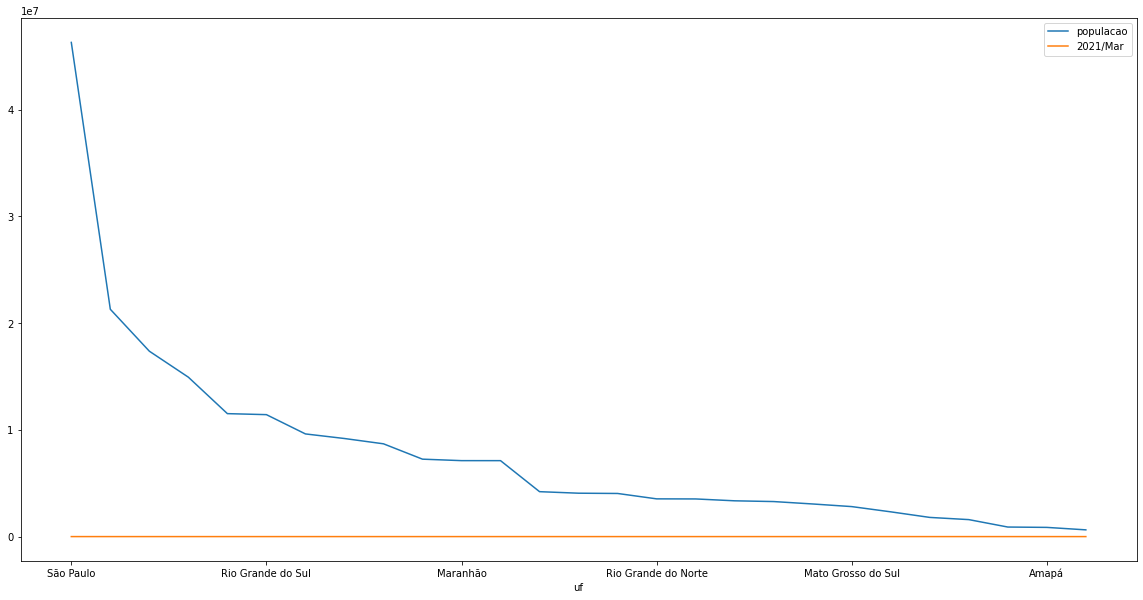

In [ ]:
 gastos_e_populacao_recente.plot(figsize=(20,10))

O que acontece é que ele plotou duas informações no mesmo eixo, gerando um gráfico que não diz nada

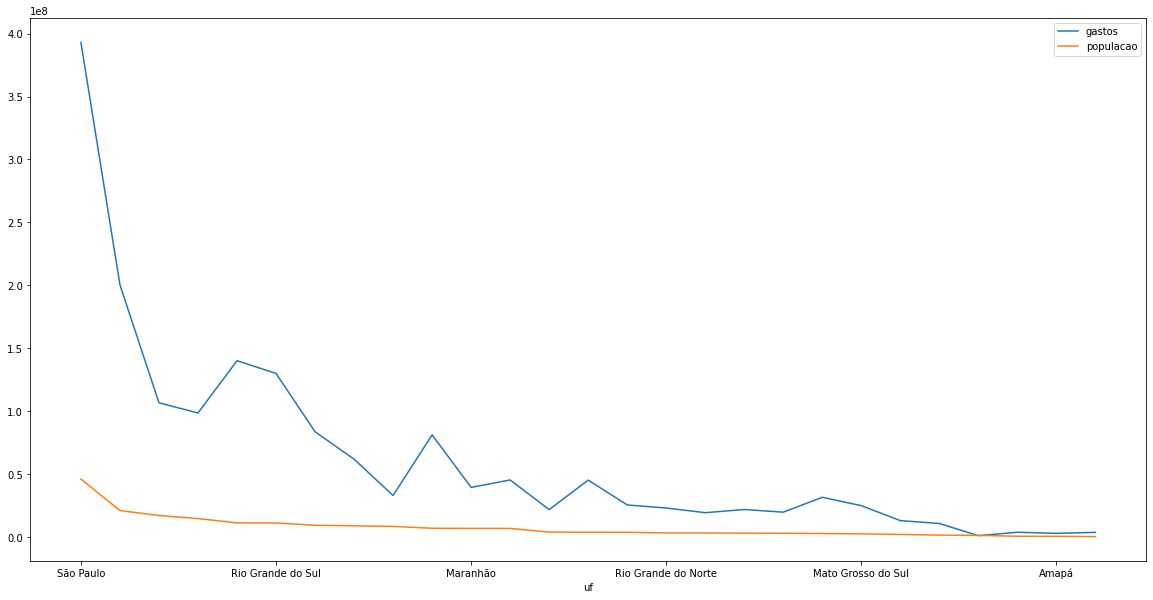

In [ ]:
gastos_e_populacao_recente['gastos'] = gastos_e_populacao_recente['2021/Mar']*1000000
gastos_e_populacao_recente[['gastos','populacao']].plot(figsize=(20,10))

Um outro exemplo de gráfico no mesmo eixo, no caso considerando duas informações que não tem semelhança alguma (muito embora, possua relações), sendo plotadas juntas e isso é horripilante



---



---



---
 Quando plotamos duas informações em um mesmo gráfico é porque queremos mostrar que exsite uma corelação entre as duas informações, O relacionamento das curvas possuem uma semelhança ou diferença relacional ao crescimento ou diminuição entre si. Portanto não faz sentido plotar gráficos com informações distintas



Analisando esses dados podemos fazer a seguinte leitura percapita

In [ ]:
gastos_e_populacao_recente

,populacao,2021/Mar,gastos
uf,,,
São Paulo,46289333,392.95,392946147.42
Minas Gerais,21292666,200.47,200471045.07
Rio de Janeiro,17366189,106.84,106837295.81
Bahia,14930634,98.75,98746333.07
Paraná,11516840,140.26,140264608.52
Rio Grande do Sul,11422973,130.16,130155185.16
Pernambuco,9616621,83.87,83870992.73
Ceará,9187103,62.08,62079618.54
Pará,8690745,33.28,33276392.89


In [ ]:
gastos_e_populacao_recente['gastos_por_habitante'] = gastos_e_populacao_recente['gastos']/gastos_e_populacao_recente['populacao']
gastos_e_populacao_recente.loc[['Rio Grande do Sul', 'São Paulo']] 

,populacao,2021/Mar,gastos,gastos_por_habitante
uf,,,,
Rio Grande do Sul,11422973,130.16,130155185.16,11.39
São Paulo,46289333,392.95,392946147.42,8.49


São Paulo teve um gasto de 2,90 menor que o Rio Grande do Sul, se olharmos o gráfico conseguimos entender que a população de São Paulo é duas vezes maior que a população do Rio Grande do Sul, mas no gráfico temos a sensação que seus gastos também são superiores, quando na verdade, ja percebemos que ele é 2,9 menor 

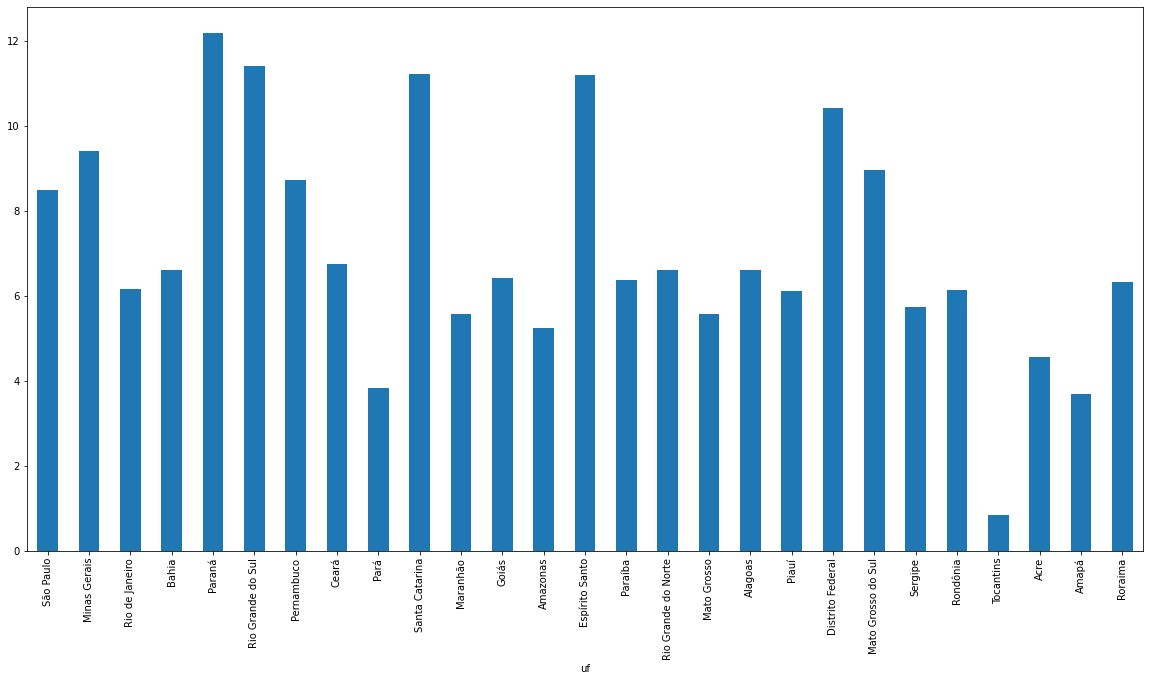

In [ ]:
gastos_e_populacao_recente['gastos_por_habitante'].plot(kind='bar',figsize=(20,10))

Esse gráfico está ordenado em valor absoluto, significa que São Paulo o Estado que mais gasta, está gastando 8 Reais por Habitante, enquanto o Mato Grosso do Sul que é o Estado na posição 20, gasta 10 Reais (2 reais a mais que SP)


Percebam que a ordem ainda conta uma história, ja que teoricamente São Paulo deveria ser o topo de uma escadinha e não é isso que acontece.

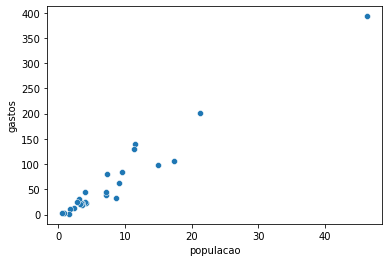

In [ ]:
import seaborn as sns

sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao',y='gastos')

plt.show()

Observando esse gráfico nota-se:

* Uma tendência dos pontos crescendo da esquerda inferior para a direita superior.

* Existe um ponto muito acima, que talvez represente um Estado com uma população absoluta, que concerteza concentra gastos proporcionais (portanto absolutos)



---



---



Pode-se afirmar que essa concentração de pontos é a relação da concentração de gastos por população. **Os gastos em função(ou relação) da população**

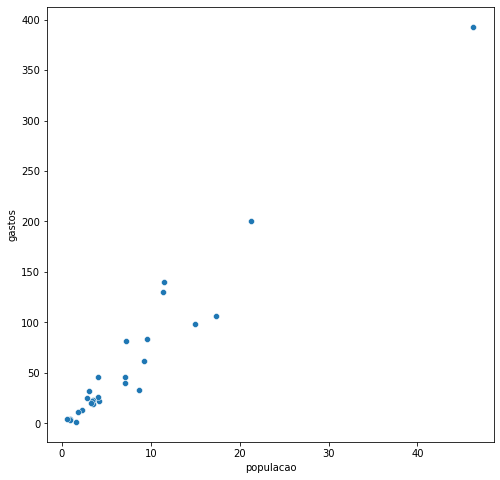

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=gastos_e_populacao_recente/1000000, x='populacao',y='gastos')

plt.show()

Conseguimos perceber que quanto maior a população, maior o gasto.

E lembrar que esse quadrado não representa 1x1, uma vez que possui grandezas (gastos,população) diferentes

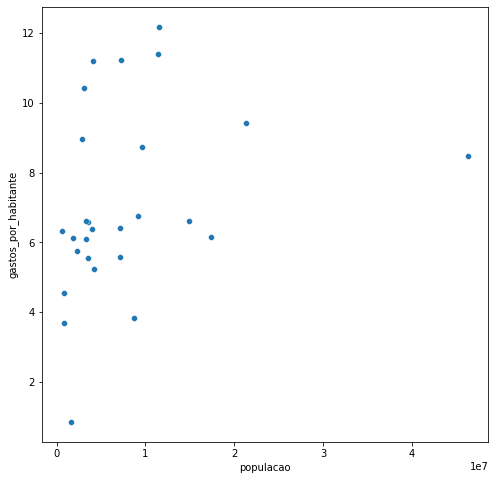

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=gastos_e_populacao_recente, x='populacao',y='gastos_por_habitante')

plt.show()

Quando é plotado o gráfico considerando o gasto por habitante, é possivel perceber que não existe mais a relação de quanto maior a população, maior será o gasto por habitante. A concentração espalhada e meio que se dirigindo da borda superior para a inferior nos diz isso

**Desafio: Ordenar por gasto por habitante. Ordenar por Habitantes**

**Desafio: Fazer os ultimos gráfios para o mês anterior a este**

**Super Desafio: Plotar os dois gráficos na mesma figura**

## Aula 2 - Desafio1

Ordenando esse dataframe:

In [ ]:
gastos_e_populacao_recente

,populacao,2021/Mar,gastos,gastos_por_habitante
uf,,,,
São Paulo,46289333,392.95,392946147.42,8.49
Minas Gerais,21292666,200.47,200471045.07,9.42
Rio de Janeiro,17366189,106.84,106837295.81,6.15
Bahia,14930634,98.75,98746333.07,6.61
Paraná,11516840,140.26,140264608.52,12.18
Rio Grande do Sul,11422973,130.16,130155185.16,11.39
Pernambuco,9616621,83.87,83870992.73,8.72
Ceará,9187103,62.08,62079618.54,6.76
Pará,8690745,33.28,33276392.89,3.83


In [ ]:
ordenado_por_habitante = gastos_e_populacao_recente.sort_values('gastos_por_habitante',ascending=False)
ordenado_por_habitante

,populacao,2021/Mar,gastos,gastos_por_habitante
uf,,,,
Paraná,11516840,140.26,140264608.52,12.18
Rio Grande do Sul,11422973,130.16,130155185.16,11.39
Santa Catarina,7252502,81.38,81376630.57,11.22
Espírito Santo,4064052,45.49,45490499.45,11.19
Distrito Federal,3055149,31.83,31831917.45,10.42
Minas Gerais,21292666,200.47,200471045.07,9.42
Mato Grosso do Sul,2809394,25.17,25168195.34,8.96
Pernambuco,9616621,83.87,83870992.73,8.72
São Paulo,46289333,392.95,392946147.42,8.49


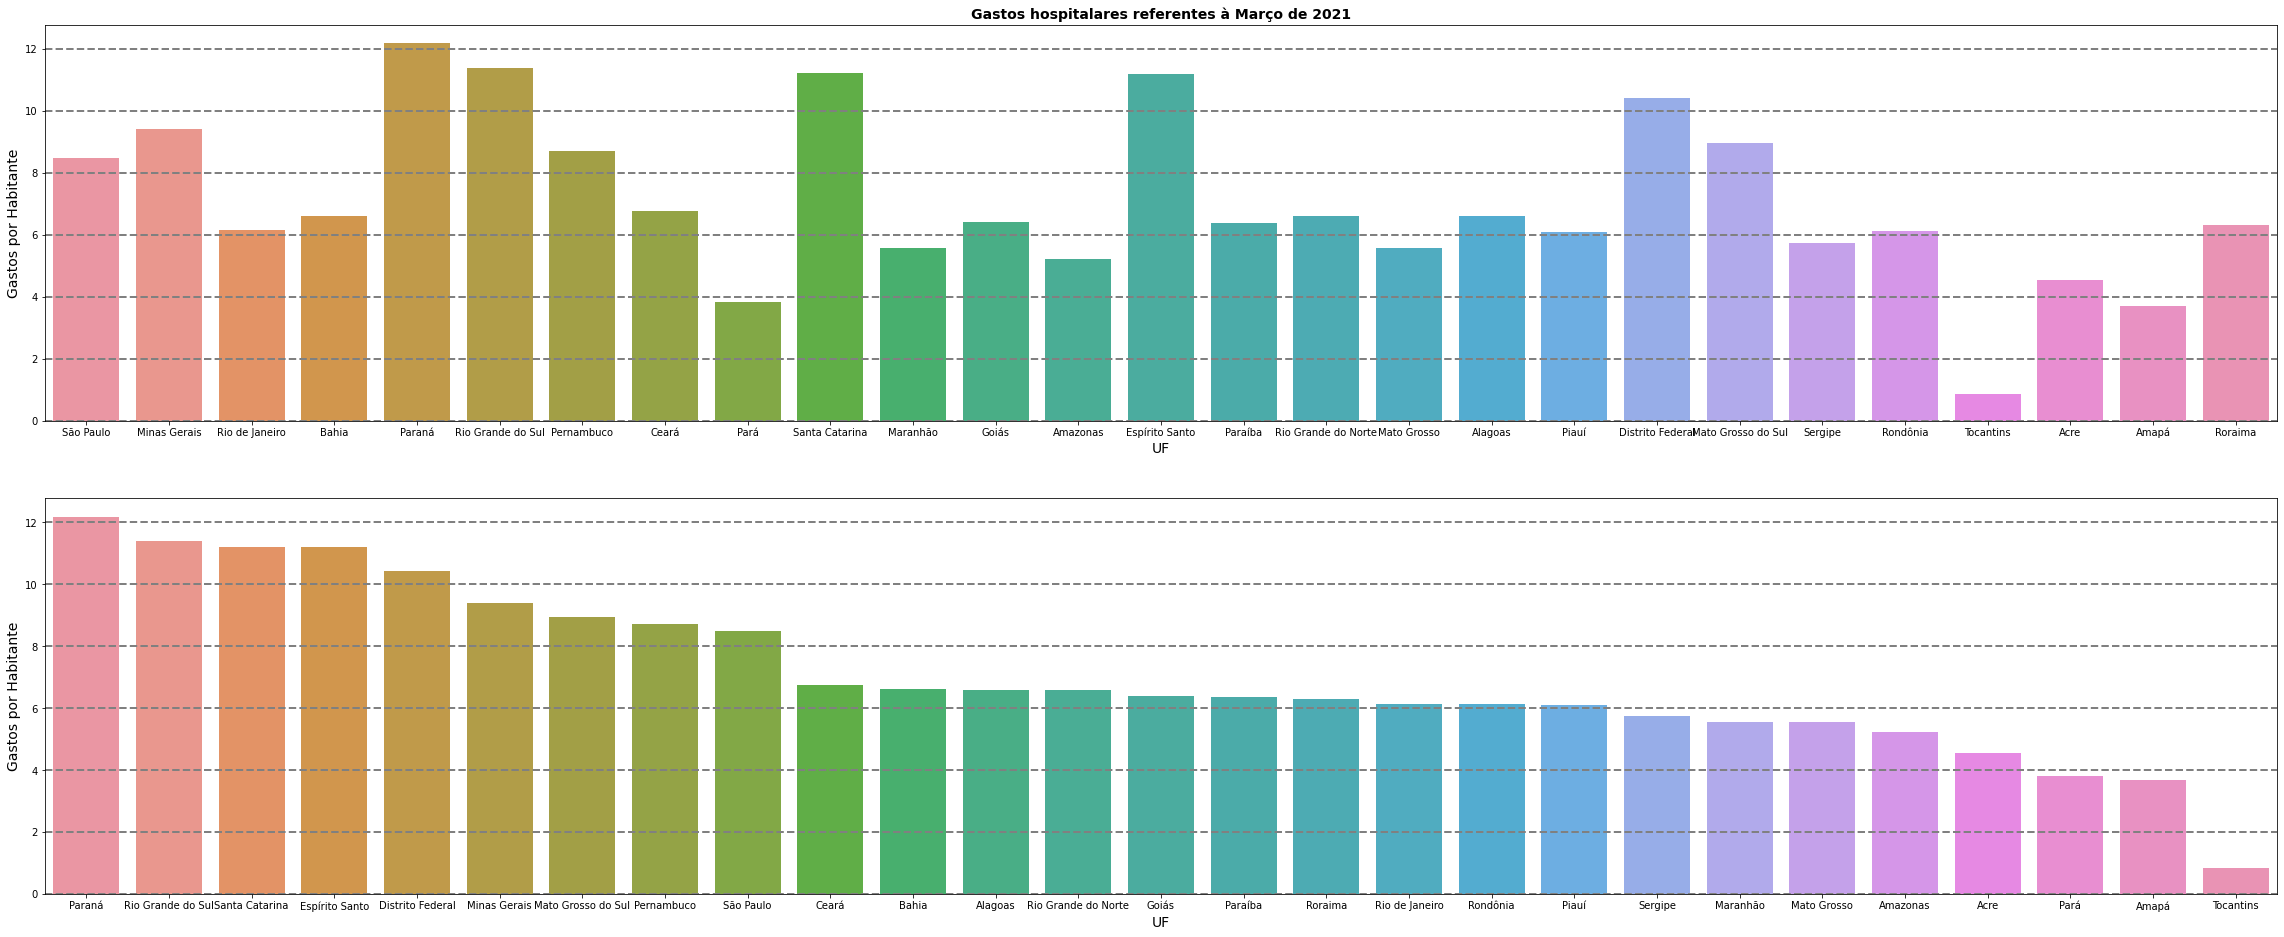

In [ ]:
#Graficos de barra

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(40,16))

#Subplot 1 
sns.barplot(data=gastos_e_populacao_recente, x=gastos_e_populacao_recente.index,y='gastos_por_habitante', ax=ax1) 
#Subplot 2
sns.barplot(data=ordenado_por_habitante, x=ordenado_por_habitante.index,y='gastos_por_habitante', ax=ax2) 


#Configurações subplot 1
ax1.set_ylabel('Gastos por Habitante', fontsize=14)
ax1.set_title('Gastos hospitalares referentes à Março de 2021',fontsize = 14, fontweight = 'bold')
ax1.set_xlabel('UF', fontsize=14)
ax1.grid(axis='y',color='gray',linestyle='--',linewidth=2,)


#Configurações subplot2
ax2.set_ylabel('Gastos por Habitante', fontsize=14)
ax2.set_xlabel('UF', fontsize=14)
ax2.grid(axis='y',color='gray',linestyle='--',linewidth=2,)

plt.subplots_adjust(hspace=0.195)
plt.show()

## Aula 2 - Desafio 2

Criando o mês anterior

In [ ]:
mes_anterior=dados_mais_recente.columns[-2]
gastos_do_mes_anterior_recente = dados_mais_recente[mes_anterior]/1000000


In [ ]:
mes_anterior

'2021/Fev'

In [ ]:
gastos_do_mes_anterior_recente

Unidade da Federação
São Paulo             0.00
Minas Gerais          0.00
Paraná                0.00
Rio Grande do Sul     0.00
Rio de Janeiro        0.00
Bahia                 0.00
Pernambuco            0.00
Santa Catarina        0.00
Ceará                 0.00
Goiás                 0.00
Pará                  0.00
Maranhão              0.00
Espírito Santo        0.00
Rio Grande do Norte   0.00
Paraíba               0.00
Distrito Federal      0.00
Mato Grosso do Sul    0.00
Piauí                 0.00
Alagoas               0.00
Mato Grosso           0.00
Amazonas              0.00
Sergipe               0.00
Tocantins             0.00
Rondônia              0.00
Acre                  0.00
Roraima               0.00
Amapá                 0.00
Name: 2021/Fev, dtype: float64

In [ ]:
gastos_do_mes_anterior_recente = gastos_e_populacao_recente.join(gastos_do_mes_anterior_recente)
gastos_do_mes_anterior_recente.head()

,populacao,2021/Mar,gastos,gastos_por_habitante,2021/Fev
uf,,,,,
São Paulo,46289333,392.95,392946147.42,8.49,0.00
Minas Gerais,21292666,200.47,200471045.07,9.42,0.00
Rio de Janeiro,17366189,106.84,106837295.81,6.15,0.00
Bahia,14930634,98.75,98746333.07,6.61,0.00
Paraná,11516840,140.26,140264608.52,12.18,0.00


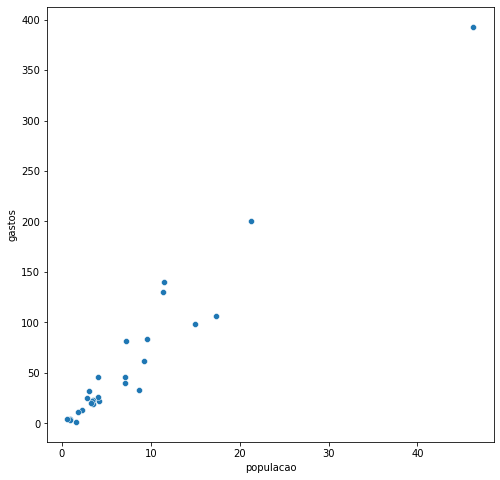

In [ ]:
#GRAFICO SCATTER - FEVEREIRO
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_do_mes_anterior_recente.drop('2021/Mar',axis=1)/1000000, x='populacao',y='gastos')

plt.show()

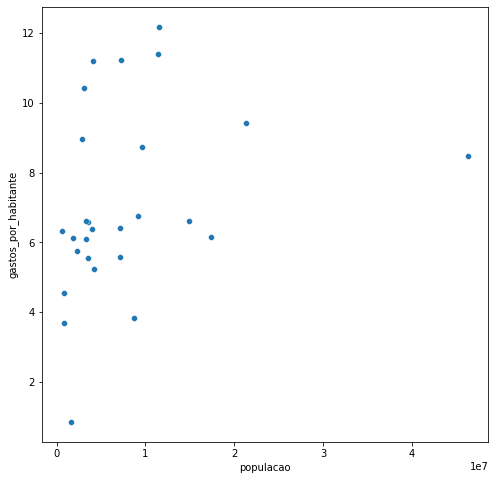

In [ ]:
#GRAFICO SCATTER - FEVEREIRO
plt.figure(figsize=(8,8))

sns.scatterplot(data=gastos_do_mes_anterior_recente.drop('2021/Mar',axis=1), x='populacao',y='gastos_por_habitante')

plt.show()

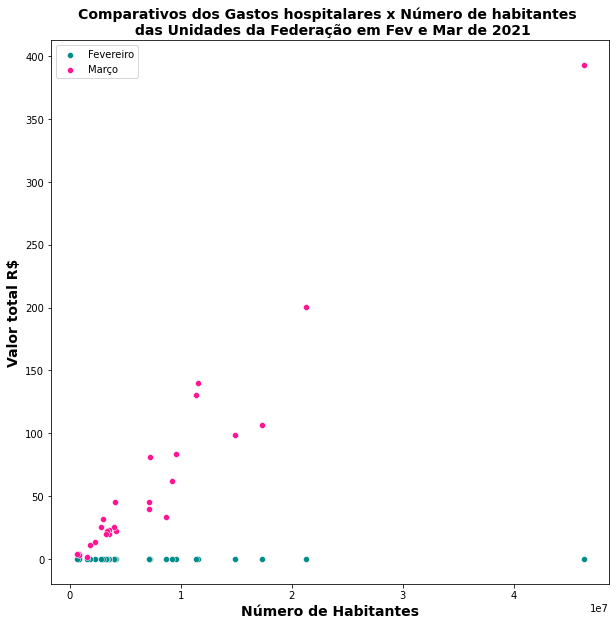

In [ ]:
fig,axes=plt.subplots(figsize=(10,10))

sns.scatterplot(data=gastos_do_mes_anterior_recente, x='populacao',y='2021/Fev', color='darkcyan', label='Fevereiro')
sns.scatterplot(data=gastos_do_mes_anterior_recente, x='populacao',y='2021/Mar', color='deeppink',label='Março')
plt.title('Comparativos dos Gastos hospitalares x Número de habitantes \n das Unidades da Federação em Fev e Mar de 2021', fontsize=14, weight='bold')
plt.xlabel('Número de Habitantes', fontsize=14, weight='bold' )
plt.ylabel('Valor total R$', fontsize=14, weight='bold')
plt.show()

Percebe que existe quase nenhuma diferença entre os dois meses, mas existe um leve aumento de Março em relação a fevereiro

## Aula 2 - Desafio 3

In [ ]:
dados_mais_recente.columns[-3:]

Index(['2021/Jan', '2021/Fev', '2021/Mar'], dtype='object')

In [ ]:
mes_anterior=dados_mais_recente.columns[-3]
janeiro = dados_mais_recente[mes_anterior]/1000000

In [ ]:
janeiro

Unidade da Federação
São Paulo             0.00
Minas Gerais          0.00
Paraná                0.00
Rio Grande do Sul     0.00
Rio de Janeiro        0.00
Bahia                 0.00
Pernambuco            0.00
Santa Catarina        0.00
Ceará                 0.00
Goiás                 0.00
Pará                  0.00
Maranhão              0.00
Espírito Santo        0.00
Rio Grande do Norte   0.00
Paraíba               0.00
Distrito Federal      0.00
Mato Grosso do Sul    0.00
Piauí                 0.00
Alagoas               0.00
Mato Grosso           0.00
Amazonas              0.00
Sergipe               0.00
Tocantins             0.00
Rondônia              0.00
Acre                  0.00
Roraima               0.00
Amapá                 0.00
Name: 2021/Jan, dtype: float64

In [ ]:
mes_anterior=dados_mais_recente.columns[-3]
gastos_do_mes_anterior_recente = gastos_do_mes_anterior_recente.join(janeiro)
gastos_do_mes_anterior_recente.head()

,populacao,2021/Mar,gastos,gastos_por_habitante,2021/Fev,2021/Jan
uf,,,,,,
São Paulo,46289333,392.95,392946147.42,8.49,0.00,0.00
Minas Gerais,21292666,200.47,200471045.07,9.42,0.00,0.00
Rio de Janeiro,17366189,106.84,106837295.81,6.15,0.00,0.00
Bahia,14930634,98.75,98746333.07,6.61,0.00,0.00
Paraná,11516840,140.26,140264608.52,12.18,0.00,0.00


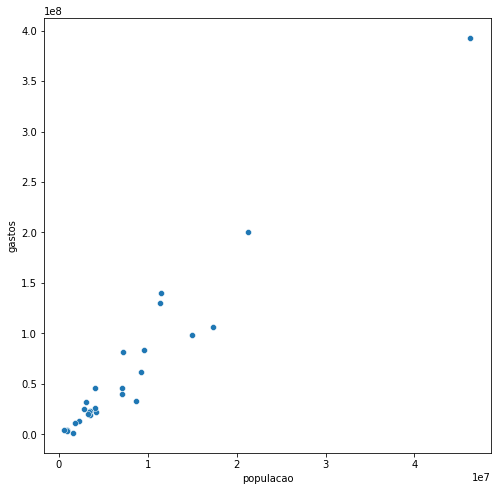

In [ ]:
#GRAFICO SCATTER - FEVEREIRO
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_do_mes_anterior_recente.drop(['2021/Mar','2021/Fev'],axis=1), x='populacao',y='gastos')

plt.show()

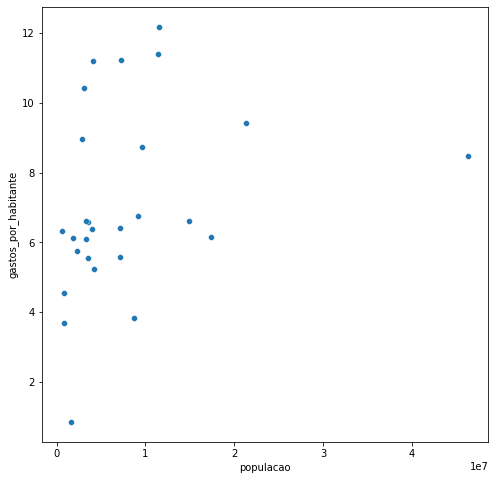

In [ ]:
#GRAFICO SCATTER - FEVEREIRO
plt.figure(figsize=(8,8))

sns.scatterplot(data=gastos_do_mes_anterior_recente.drop(['2021/Mar','2021/Fev'],axis=1), x='populacao',y='gastos_por_habitante')

plt.show()

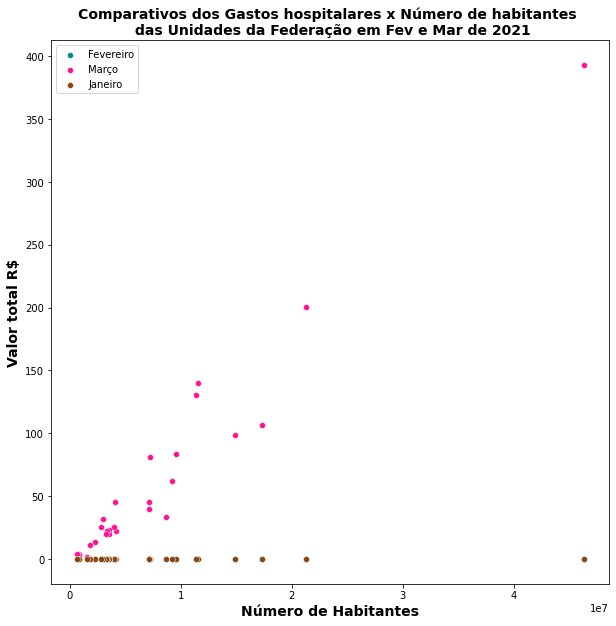

In [ ]:
fig,axes=plt.subplots(figsize=(10,10))

sns.scatterplot(data=gastos_do_mes_anterior_recente, x='populacao',y='2021/Fev', color='darkcyan', label='Fevereiro')
sns.scatterplot(data=gastos_do_mes_anterior_recente, x='populacao',y='2021/Mar', color='deeppink',label='Março')
sns.scatterplot(data=gastos_do_mes_anterior_recente, x='populacao',y='2021/Jan', color='saddlebrown',label='Janeiro')
plt.title('Comparativos dos Gastos hospitalares x Número de habitantes \n das Unidades da Federação em Fev e Mar de 2021', fontsize=14, weight='bold')
plt.xlabel('Número de Habitantes', fontsize=14, weight='bold' )
plt.ylabel('Valor total R$', fontsize=14, weight='bold')
plt.show()

## Aula 2 - Desafio 3 - MÉTODO DO GUI E THIAGO

In [ ]:
#Criando uma função
def insere_gastos_e_gastos_por_habitante_para(todos_os_gastos: pd.DataFrame,dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f'gastos_{mes}'] = gastos_do_mes * 1000000
  dados[f'gastos_por_habitante_{mes}'] = dados[f'gastos_{mes}']/dados['populacao']

In [ ]:
insere_gastos_e_gastos_por_habitante_para(dados_mais_recente, gastos_e_populacao_recente, "2017/Jul")

In [ ]:
insere_gastos_e_gastos_por_habitante_para(dados_mais_recente,gastos_e_populacao_recente,'2020/Jan')
insere_gastos_e_gastos_por_habitante_para(dados_mais_recente,gastos_e_populacao_recente,'2020/Fev')
insere_gastos_e_gastos_por_habitante_para(dados_mais_recente,gastos_e_populacao_recente,'2020/Mar')

In [ ]:
gastos_e_populacao_recente

,populacao,2021/Mar,gastos,gastos_por_habitante,gastos_2017/Jul,gastos_por_habitante_2017/Jul,gastos_2020/Jan,gastos_por_habitante_2020/Jan,gastos_2020/Fev,gastos_por_habitante_2020/Fev,gastos_2020/Mar,gastos_por_habitante_2020/Mar
uf,,,,,,,,,,,,
São Paulo,46289333,392.95,392946147.42,8.49,297881361.74,6.44,304511719.34,6.58,288872273.89,6.24,297359679.70,6.42
Minas Gerais,21292666,200.47,200471045.07,9.42,146849636.29,6.90,159280453.89,7.48,150237121.46,7.06,142897333.08,6.71
Rio de Janeiro,17366189,106.84,106837295.81,6.15,75302602.85,4.34,83186258.72,4.79,76116203.22,4.38,77004637.47,4.43
Bahia,14930634,98.75,98746333.07,6.61,63845395.83,4.28,72991644.23,4.89,70076183.91,4.69,73156459.75,4.90
Paraná,11516840,140.26,140264608.52,12.18,116359245.54,10.10,122357489.56,10.62,127010218.52,11.03,117317015.92,10.19
Rio Grande do Sul,11422973,130.16,130155185.16,11.39,96174533.70,8.42,94908336.74,8.31,91437940.91,8.00,102876132.83,9.01
Pernambuco,9616621,83.87,83870992.73,8.72,69762828.96,7.25,70161441.76,7.30,64822616.22,6.74,66221727.51,6.89
Ceará,9187103,62.08,62079618.54,6.76,46353321.61,5.05,50630584.39,5.51,50725074.22,5.52,47009985.82,5.12
Pará,8690745,33.28,33276392.89,3.83,32771002.63,3.77,34365985.58,3.95,37417579.86,4.31,35610330.34,4.10


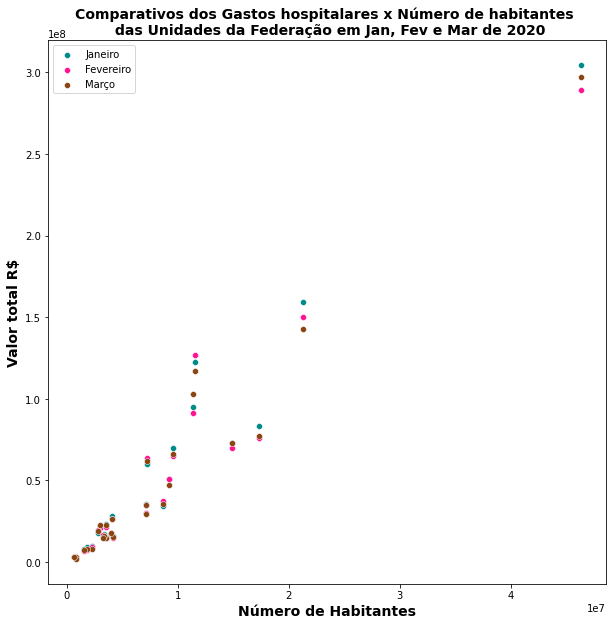

In [ ]:
fig,axes=plt.subplots(figsize=(10,10))

sns.scatterplot(data=gastos_e_populacao_recente, x='populacao',y='gastos_2020/Jan', color='darkcyan', label='Janeiro')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao',y='gastos_2020/Fev', color='deeppink',label='Fevereiro')
sns.scatterplot(data=gastos_e_populacao_recente, x='populacao',y='gastos_2020/Mar', color='saddlebrown',label='Março')
plt.title('Comparativos dos Gastos hospitalares x Número de habitantes \n das Unidades da Federação em Jan, Fev e Mar de 2020', fontsize=14, weight='bold')
plt.xlabel('Número de Habitantes', fontsize=14, weight='bold' )
plt.ylabel('Valor total R$', fontsize=14, weight='bold')
plt.show()

## Aula 2 - Desafio 4 

Desafio - Discutir Gráficos

Comparando o gráfico acima conegue-se perceber um padrão parecido entre os meses em uma tendência de queda desse valor. De fevereiro para março São Paulo apresentou uma diferença de 18 milhões reais em total absoluto e uma diferença de 18 reais por pessoa

# Aula 3 

In [ ]:
dados_mais_recente.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91.68,148.68,156.09,161.23,187.12,187.29,194.40,184.85,188.64,179.71,167.99,191.86,182.80,186.86,212.78,203.19,217.04,217.20,220.76,232.54,221.99,220.12,209.09,214.57,203.12,227.25,231.54,230.19,226.02,229.66,234.53,233.45,221.13,239.79,236.93,227.53,231.06,241.95,236.44,244.46,...,280.08,279.20,269.52,286.78,289.71,293.10,287.92,291.52,298.70,282.74,295.67,283.95,283.18,298.18,279.43,288.82,297.83,303.89,293.59,305.03,313.87,298.55,310.85,292.85,284.75,304.51,288.87,297.36,251.33,272.49,306.77,367.65,349.90,354.12,345.73,335.08,330.49,355.15,348.83,392.95
Minas Gerais,45.67,70.19,79.23,77.14,80.55,94.76,85.36,84.72,84.60,85.56,78.33,86.92,91.37,90.15,95.29,94.09,99.08,96.19,102.75,100.08,97.96,100.73,95.35,99.02,91.52,101.60,102.02,103.35,102.49,104.43,104.33,102.06,102.30,104.62,106.03,102.85,103.10,107.15,109.40,110.96,...,142.85,143.16,136.71,149.83,149.89,151.55,151.51,156.68,154.28,153.87,151.23,144.87,146.72,154.07,147.97,153.46,156.78,162.96,154.83,166.21,164.29,156.57,165.12,153.01,153.90,159.28,150.24,142.90,133.42,133.51,139.94,165.76,171.05,175.44,178.28,175.25,172.51,174.72,177.27,200.47
Paraná,38.27,55.38,53.80,52.46,54.42,57.81,58.09,56.98,57.55,57.12,53.12,63.91,64.52,60.78,65.63,64.76,65.90,66.28,69.16,68.26,66.39,66.40,67.07,65.49,62.24,70.70,70.37,72.06,71.94,72.37,74.71,72.79,72.85,75.60,74.37,75.11,72.13,73.76,76.60,75.66,...,115.17,118.80,110.31,116.63,120.06,121.36,122.17,124.61,127.87,123.93,125.32,125.32,117.53,122.46,119.84,123.29,120.18,126.48,125.53,125.98,126.17,126.97,131.59,127.10,117.91,122.36,127.01,117.32,94.60,107.51,96.98,109.72,129.53,122.70,129.65,126.86,120.04,122.12,132.62,140.26
Rio Grande do Sul,30.93,57.36,51.55,56.67,48.40,52.41,56.64,56.11,55.36,53.64,53.70,58.73,57.63,58.78,63.37,62.20,61.68,62.50,64.61,66.46,65.78,63.71,64.49,66.30,61.53,62.49,66.81,67.90,64.80,68.52,68.73,66.17,66.89,67.46,67.10,60.75,58.88,66.21,61.55,67.01,...,82.93,88.82,80.57,87.42,89.40,88.15,90.75,89.09,94.01,93.66,90.03,93.08,89.05,89.66,89.26,85.59,95.15,94.16,92.24,102.30,100.26,95.92,102.33,93.97,90.78,94.91,91.44,102.88,83.00,82.38,86.09,100.58,102.61,104.40,117.46,108.85,111.76,119.99,111.80,130.16
Rio de Janeiro,23.03,28.39,44.57,44.05,44.91,48.06,49.87,50.91,49.27,46.43,39.91,50.58,46.20,47.09,50.81,49.19,54.04,50.72,55.05,56.20,52.06,54.30,49.77,47.25,50.66,56.12,52.07,59.40,56.87,59.81,60.27,56.85,56.97,56.23,55.77,54.47,54.49,57.19,57.53,59.42,...,71.18,72.53,70.91,75.60,76.00,78.03,77.68,83.73,80.45,77.38,79.40,75.08,71.29,80.14,73.54,76.15,75.85,86.64,80.13,89.92,85.72,82.97,86.39,80.84,78.58,83.19,76.12,77.00,71.40,85.12,91.74,99.33,96.34,88.31,87.00,86.78,90.42,94.18,85.58,106.84


Plotando um gráfico de São Paulo

Podemos usar o scatterplot sem um Dataframe, apenas com listas

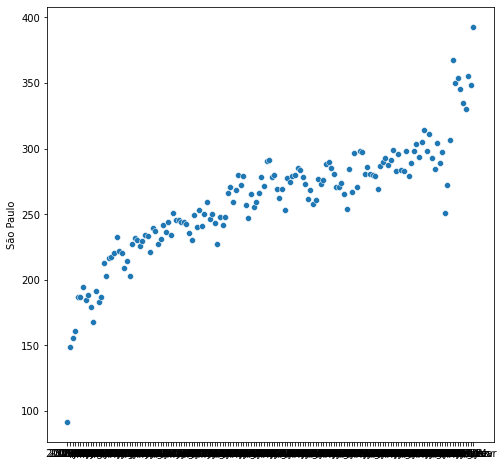

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=dados_mais_recente.columns,y=dados_mais_recente.loc['São Paulo'])

plt.show()

Mas esse uso aqui em cima não é o uso tradicional do Scatterplot. O Uso tradicional do Scatterplot é você informar qual coluna você quer plotar

Usando o metodo de transpor o DataFrame, é possivel obter a coluna relativa ao estado de SP

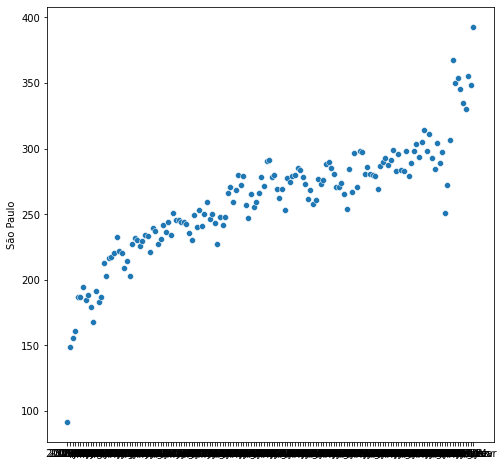

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=dados_mais_recente.T, x=dados_mais_recente.T.index,y='São Paulo')

plt.show()

Tornando ainda mais organizado, posso fazer

In [ ]:
mensal=dados_mais_recente.T

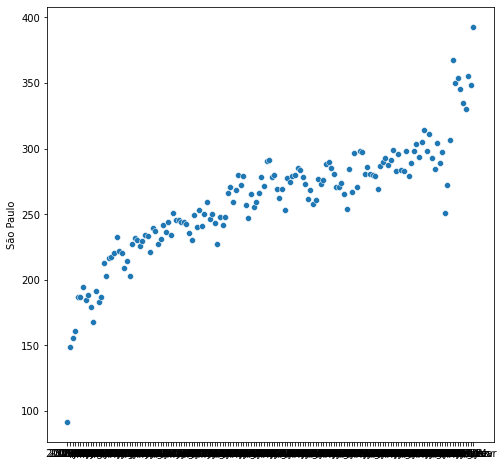

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=mensal, x=mensal.index,y='São Paulo')
plt.show()

In [ ]:
mensal.astype(float)

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jan,91.68,45.67,38.27,30.93,23.03,21.21,14.39,16.50,15.54,15.31,18.86,10.72,5.46,5.95,10.72,4.75,5.38,7.99,6.24,4.80,4.74,2.78,3.44,1.39,0.90,0.66,1.12
2008/Fev,148.68,70.19,55.38,57.36,28.39,28.19,24.18,25.65,25.74,22.26,19.55,13.56,9.10,9.51,11.39,7.63,7.00,10.08,8.38,8.68,7.12,3.68,4.99,2.93,1.50,0.78,1.27
2008/Mar,156.09,79.23,53.80,51.55,44.57,34.18,29.99,26.74,28.72,21.44,21.94,13.99,10.25,10.35,12.05,9.65,8.42,10.30,8.41,7.89,8.20,5.05,6.21,1.54,1.79,0.72,0.97
2008/Abr,161.23,77.14,52.46,56.67,44.05,39.03,34.81,27.18,30.68,20.92,20.84,14.81,11.25,10.86,12.65,11.10,8.80,10.78,9.09,8.79,8.26,5.05,4.98,1.53,1.73,0.84,1.14
2008/Mai,187.12,80.55,54.42,48.40,44.91,42.95,32.15,26.85,30.60,21.62,23.25,14.51,10.20,11.16,12.22,12.89,9.77,10.40,9.34,9.23,7.83,4.74,5.51,1.65,1.82,0.86,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020/Nov,335.08,175.25,126.86,108.85,86.78,86.26,78.90,68.46,56.92,43.04,39.00,31.94,32.03,24.74,18.42,20.46,22.02,18.91,18.60,20.51,19.90,12.26,0.53,9.36,3.28,3.62,2.22
2020/Dez,330.49,172.51,120.04,111.76,90.42,85.87,70.98,70.33,50.85,44.15,38.02,30.78,33.67,23.85,18.10,22.99,19.63,20.88,17.81,19.58,17.77,11.45,0.68,8.88,3.70,3.45,2.57
2021/Jan,355.15,174.72,122.12,119.99,94.18,79.96,83.85,71.97,52.08,46.13,38.35,30.74,39.64,28.04,19.52,23.53,21.69,22.69,17.54,19.12,21.43,12.06,0.42,9.27,3.72,3.27,2.80
2021/Fev,348.83,177.27,132.62,111.80,85.58,81.99,75.56,74.34,53.17,42.74,37.69,30.92,40.24,26.32,21.30,22.77,24.34,19.40,18.53,18.35,25.92,13.00,0.32,7.73,3.54,3.52,2.82


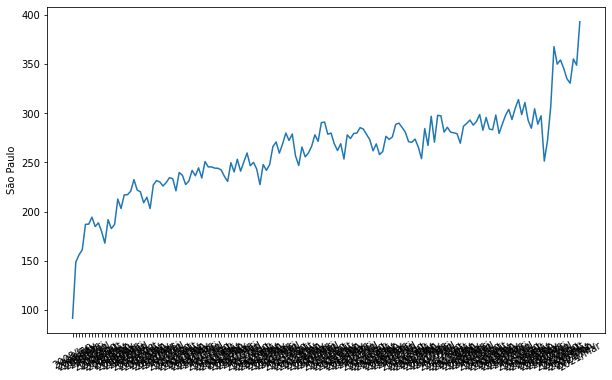

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')

#mudando a posição dos ticks
plt.xticks(rotation=30)
plt.show()

Através do set_major_locator eu posso definir o local em algum dos meus axis. E isso ajuda a definir de quantos em quantos meses eu quero que apareça

Usando o construtor AutoLocator()

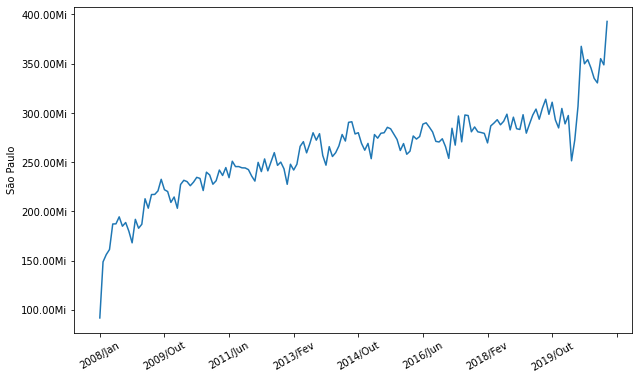

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))
#mudando a posição dos ticks
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

Um problema é que agora se torna dificil observar onde começa e onde termina um ano, são datas muito espassadas para tirar conclusões

Uma Boa analisada na documentação do tick locator conseguimos encontrar formas diferentes de espalhar esses anos. Será utilizado aqui o IndexLocator(base=0.5, offset = 0.25)

[Documentação](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html)

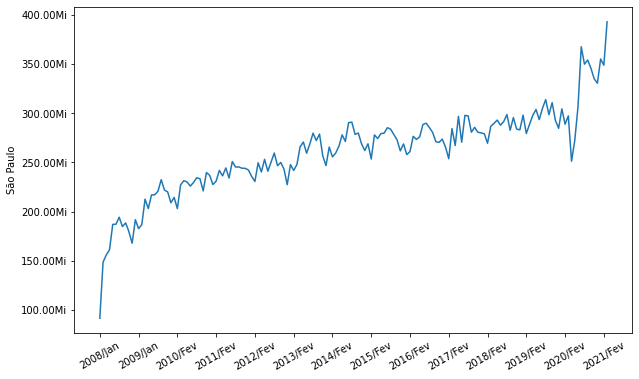

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))
#mudando a posição dos ticks
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.show()

O seaborn serve pra se criar visualizações de forma mais simples, mas por de baixo dos panos ele utiliza o matplotlib


Podemos cruzar as suas utilizações, podemos adicionar um grid

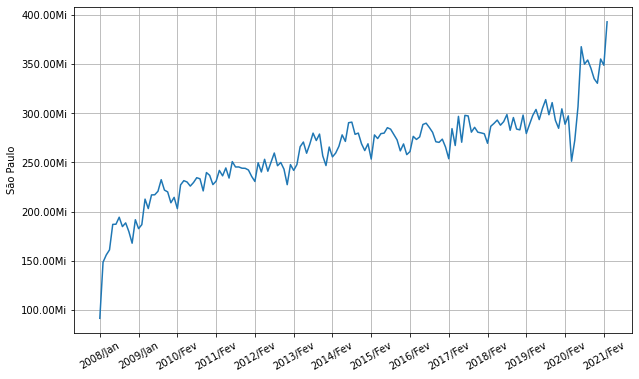

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))
#mudando a posição dos ticks
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True)
plt.show()

alterando o limite do eixo y

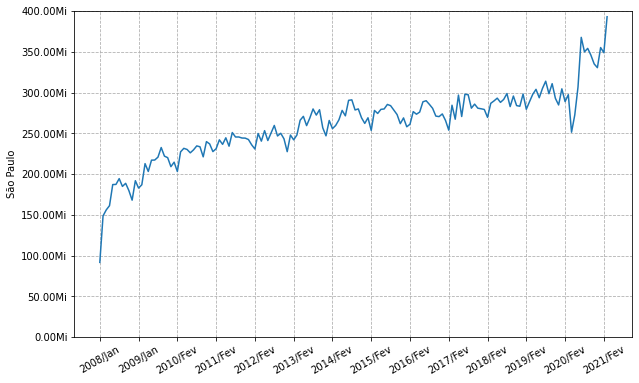

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}" + 'Mi'))
#mudando a posição dos ticks
plt.xticks(rotation=30)
plt.ylim(0,400)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(linestyle='--')
plt.show()

**O que aprendemos nesta Aula:**

Como criar um Scatterplot com o Seaborn;
Como formatar ticks ajustando sua localização da forma mais adequada possível;
Como criar um grid em suas visualizações para facilitar a análise.

## Aula 3 - Desafio 1 

 Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

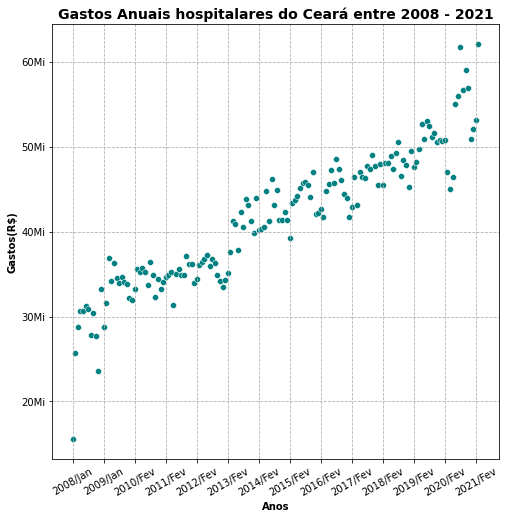

In [ ]:
plt.figure(figsize=(8,8))
#Criar Grafico
ax = sns.scatterplot(data=mensal, x=mensal.index,y='Ceará', color ='teal')

#formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}" + 'Mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation=30)

#Colcando Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Gastos Anuais hospitalares do Ceará entre 2008 - 2021', fontsize=14,fontweight='bold')

#Colocando grids
plt.grid(linestyle='--')

#Mostrar o gráfico
plt.show()

Plotando o gráfio de linhas também

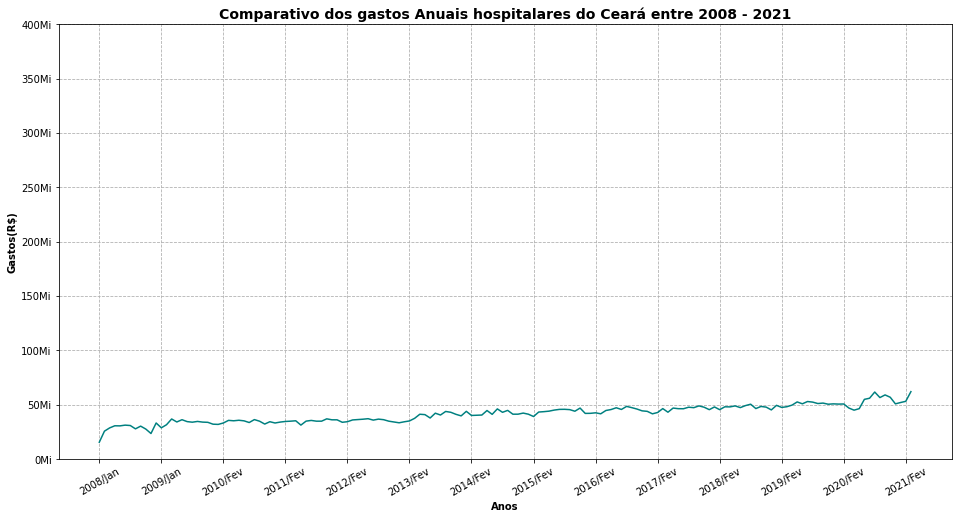

In [ ]:
plt.figure(figsize=(16,8))

#criar a figura
ax=sns.lineplot(data=mensal,x=mensal.index,y='Ceará', color= 'teal')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares do Ceará entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

## Aula 3 - Desafio 2 

Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

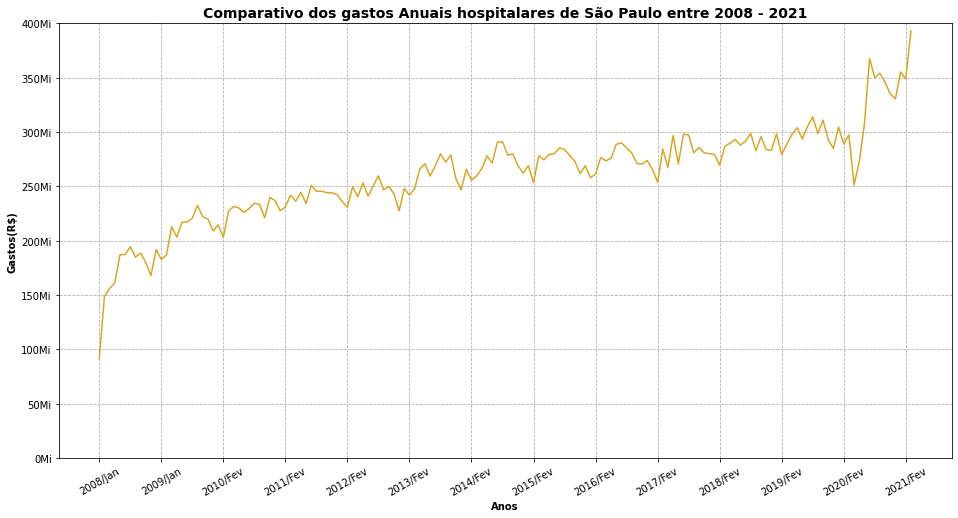

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal,x=mensal.index,y='São Paulo', color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

Plotando novamente o gráfico scatter de São Paulo
dessa vez todo ja configurado

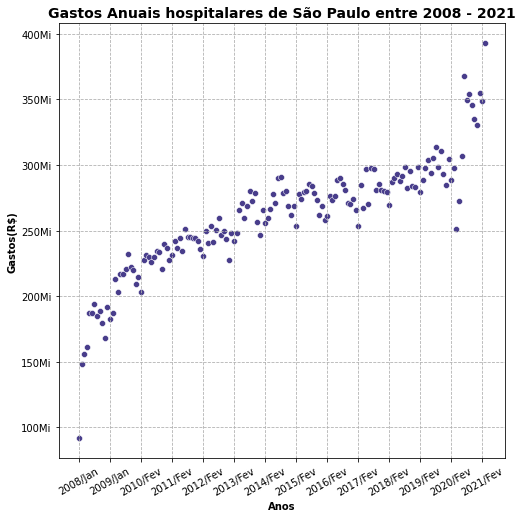

In [ ]:
plt.figure(figsize=(8,8))
#Criar Grafico
ax = sns.scatterplot(data=mensal, x=mensal.index,y='São Paulo', color ='darkslateblue')

#formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}" + 'Mi'))
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.xticks(rotation=30)

#Colcando Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

#Colocando grids
plt.grid(linestyle='--')

#Mostrar o gráfico
plt.show()

# Aula 4 

Nessa aula será avançado a edição desse gráfico, trabalhando as datas do dataframe que até o presente momento, não são datas, mas strings:


Transformando essas strings em datas através do pacote datetime

In [ ]:
from datetime import date

#dentro dos (Ano,mês,dia)
date(2020,11,3)

datetime.date(2020, 11, 3)

In [ ]:
#Vizualizando as datas
mensal.index

Index(['2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun',
       '2008/Jul', '2008/Ago', '2008/Set', '2008/Out',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=158)

Agora aplicando a função Para_dia

Através dessa função, a string 2008/Jan será transformada em 2008/01/01 (incluindo o dia, ja que o datetime.date, pede dia)

In [ ]:
meses = {
  'Jan':1,
  'Fev':2,
  'Mar':3,
  'Abr':4,
  'Mai':5,
  'Jun':6,
  'Jul':7,
  'Ago':8,
  'Set':9,
  'Out':10,
  'Nov':11,
  'Dez':12   
}

def para_dia(ano_mes: str):
  ano:int = int(ano_mes[:4])
  mes:str = ano_mes[5:] #aqui a variavel está como str pq no nosso dataframe os meses são Jan, Fev, Mar. 
  mes_numero:int = meses[mes] #aqui a variavel mes_numero guarda a transformação dos nomes em número
  return date(ano,mes_numero,1)

mensal.index = mensal.index.map(para_dia)
mensal.head()


Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-01-01,91.68,45.67,38.27,30.93,23.03,21.21,14.39,16.50,15.54,15.31,18.86,10.72,5.46,5.95,10.72,4.75,5.38,7.99,6.24,4.80,4.74,2.78,3.44,1.39,0.90,0.66,1.12
2008-02-01,148.68,70.19,55.38,57.36,28.39,28.19,24.18,25.65,25.74,22.26,19.55,13.56,9.10,9.51,11.39,7.63,7.00,10.08,8.38,8.68,7.12,3.68,4.99,2.93,1.50,0.78,1.27
2008-03-01,156.09,79.23,53.80,51.55,44.57,34.18,29.99,26.74,28.72,21.44,21.94,13.99,10.25,10.35,12.05,9.65,8.42,10.30,8.41,7.89,8.20,5.05,6.21,1.54,1.79,0.72,0.97
2008-04-01,161.23,77.14,52.46,56.67,44.05,39.03,34.81,27.18,30.68,20.92,20.84,14.81,11.25,10.86,12.65,11.10,8.80,10.78,9.09,8.79,8.26,5.05,4.98,1.53,1.73,0.84,1.14
2008-05-01,187.12,80.55,54.42,48.40,44.91,42.95,32.15,26.85,30.60,21.62,23.25,14.51,10.20,11.16,12.22,12.89,9.77,10.40,9.34,9.23,7.83,4.74,5.51,1.65,1.82,0.86,0.87


Plotando novamente o o gráfico de sp

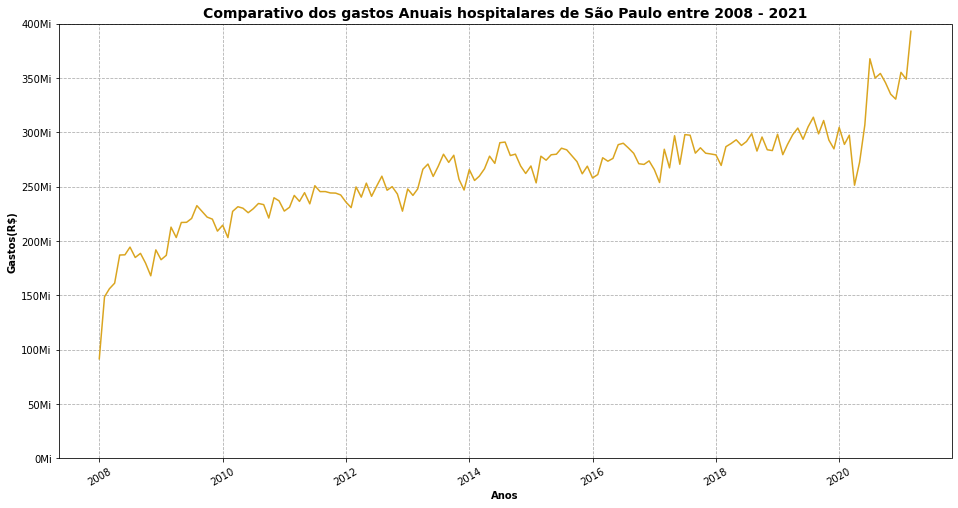

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal,x=mensal.index,y='São Paulo', color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

O que aconteceu aqui foi que ele mesmo (o programa) percebeu que deveria colocar os anos.

Agora as bibliotecas do pandas elas são mais inteligentes pois perceberam que estão utilizando datas no lugar de strings

Agora aprendendo a usar o melt

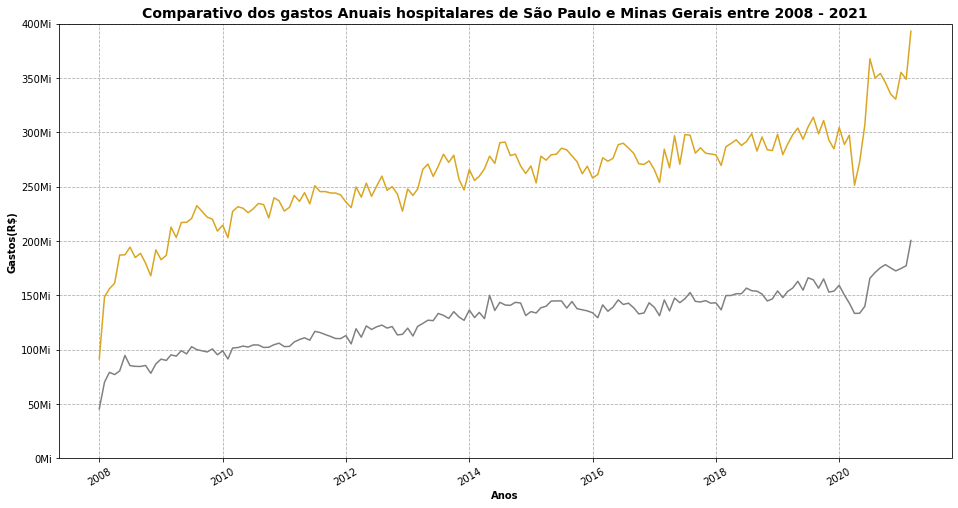

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal,x=mensal.index,y='São Paulo', color= 'goldenrod')
ax=sns.lineplot(data=mensal,x=mensal.index,y='Minas Gerais', color= 'gray')
#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo e Minas Gerais entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

Esse mapa tem problemas de legendas ja que não consegue-se diferenciar duas linhas e ainda tem um problema de que para plotar duas linhas foi preciso fazer um copy paste.


Através do melt pode-se resolver esse segundo problema



---



---


O que se quer aqui é criar uma nova tabela onde um mesmo mês tenha vários estados do tipo:  

````
MES            VALOR            ESTADO
2008-03        170.48           São Paulo
2008-03         79.12           Minas Gerais
````



Através do melt pode-se dobrar o número de linhas no caso as datas e selecionar quais colunas que não serão duplicadas.

In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'],value_vars=mensal.columns)

#Alterando os valores das colunas
mensal_aberto.columns = ['mes','uf','gasto']
mensal_aberto.head()

,mes,uf,gasto
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12


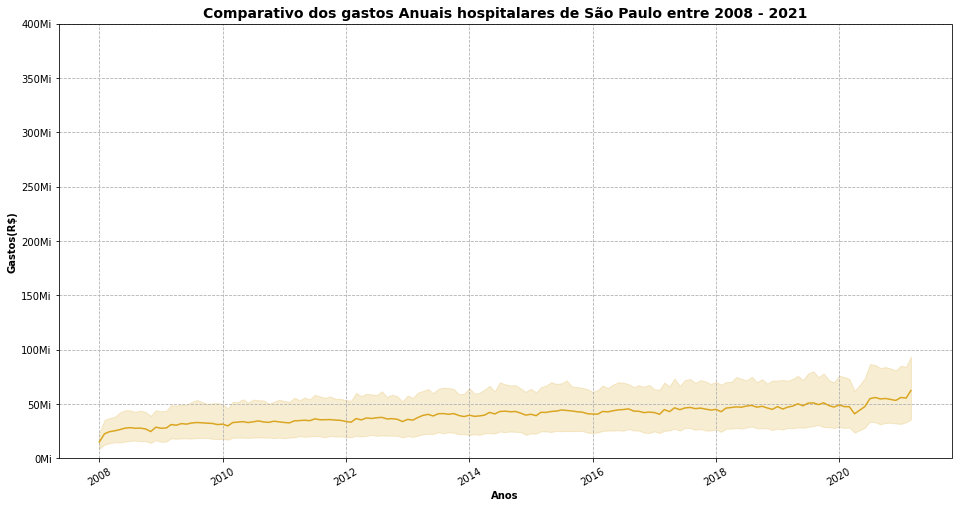

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto,x='mes',y='gasto', color= 'goldenrod')
#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

O gráfico acima representa a média (linha) de cada ano. A faixa (em tom pastel) é o intervalo de confiança que ele cria para cada mês.

Se eu preciso que o seaborn me mostre as 27 linhas e eu sei que ele conseguiu agrupar todos eles no eixo x, eu posso utilizar o hue, para plotar os 27 gráficos


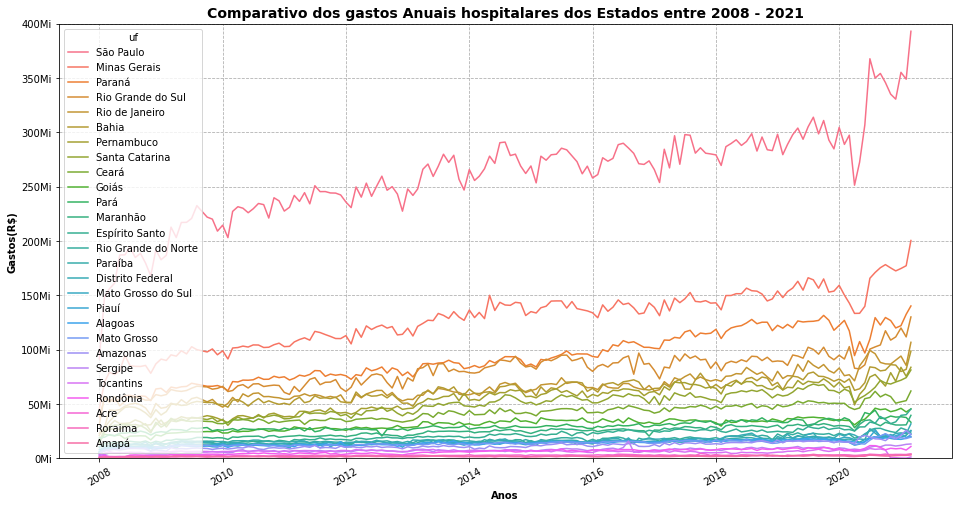

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto,x='mes',y='gasto', color= 'goldenrod', hue ='uf')
#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares dos Estados entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

O que aprendemos nessa aula:

Quais caminhos não seguir na hora de trabalhar com Datatime;
Como usar Map, aplicando uma função no DataFrame;
Como usar o Melt no processamento dos dados.

##Aula 4 - Desafio 1 

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.


O datatime é um modulo que tem como principal função a manipulação de datas e tempo (horas). Algumas de suas funções:

* datetime.MINYEAR(): O ano com menor número
* datetime.MAXYEAR(): O ano com maior número
* datetime.date.min(): O ano mais antigo 
* datetime.date.max(): O ano mais recente
* datetime.date.weekday(): Retorna o dia da semana com um número inteiro onde 0 - é a segunda e 6 é o domingo

##Aula 4 - Desafio 2 

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do `mensal_aberto` chegando no mensal.

In [ ]:

mensal_aberto2 = mensal.reset_index().melt(id_vars='index', var_name='uf', value_name='gasto')
mensal_aberto2

mensal2 = mensal_aberto2.pivot_table(values='gasto',columns='uf',index='index')
mensal2

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0.90,6.24,1.12,4.74,21.21,15.54,4.75,5.46,15.31,10.72,4.80,5.38,45.67,38.27,10.72,18.86,14.39,7.99,5.95,30.93,23.03,1.39,0.66,16.50,2.78,91.68,3.44
2008-02-01,1.50,8.38,1.27,7.12,28.19,25.74,7.63,9.10,22.26,13.56,8.68,7.00,70.19,55.38,11.39,19.55,24.18,10.08,9.51,57.36,28.39,2.93,0.78,25.65,3.68,148.68,4.99
2008-03-01,1.79,8.41,0.97,8.20,34.18,28.72,9.65,10.25,21.44,13.99,7.89,8.42,79.23,53.80,12.05,21.94,29.99,10.30,10.35,51.55,44.57,1.54,0.72,26.74,5.05,156.09,6.21
2008-04-01,1.73,9.09,1.14,8.26,39.03,30.68,11.10,11.25,20.92,14.81,8.79,8.80,77.14,52.46,12.65,20.84,34.81,10.78,10.86,56.67,44.05,1.53,0.84,27.18,5.05,161.23,4.98
2008-05-01,1.82,9.34,0.87,7.83,42.95,30.60,12.89,10.20,21.62,14.51,9.23,9.77,80.55,54.42,12.22,23.25,32.15,10.40,11.16,48.40,44.91,1.65,0.86,26.85,4.74,187.12,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,3.28,18.60,2.22,19.90,86.26,56.92,20.46,32.03,43.04,31.94,20.51,22.02,175.25,126.86,18.42,39.00,78.90,18.91,24.74,108.85,86.78,9.36,3.62,68.46,12.26,335.08,0.53
2020-12-01,3.70,17.81,2.57,17.77,85.87,50.85,22.99,33.67,44.15,30.78,19.58,19.63,172.51,120.04,18.10,38.02,70.98,20.88,23.85,111.76,90.42,8.88,3.45,70.33,11.45,330.49,0.68
2021-01-01,3.72,17.54,2.80,21.43,79.96,52.08,23.53,39.64,46.13,30.74,19.12,21.69,174.72,122.12,19.52,38.35,83.85,22.69,28.04,119.99,94.18,9.27,3.27,71.97,12.06,355.15,0.42


##Aula4 -  Desafio 3

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.

In [ ]:
cinco_meses = mensal.T.head().index.tolist()
cinco_meses

['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul', 'Rio de Janeiro']

In [ ]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12


In [ ]:
mensal_aberto.sort_values(by='gasto',ascending=False)

,mes,uf,gasto
157,2021-03-01,São Paulo,392.95
149,2020-07-01,São Paulo,367.65
155,2021-01-01,São Paulo,355.15
151,2020-09-01,São Paulo,354.12
150,2020-08-01,São Paulo,349.90
...,...,...,...
3630,2020-12-01,Tocantins,0.68
3950,2008-01-01,Roraima,0.66
3629,2020-11-01,Tocantins,0.53
3631,2021-01-01,Tocantins,0.42


In [ ]:
cinco_maiores_gastos = mensal_aberto.query('uf in @cinco_meses')
cinco_maiores_gastos

,mes,uf,gasto
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12
...,...,...,...
785,2020-11-01,Rio de Janeiro,86.78
786,2020-12-01,Rio de Janeiro,90.42
787,2021-01-01,Rio de Janeiro,94.18
788,2021-02-01,Rio de Janeiro,85.58


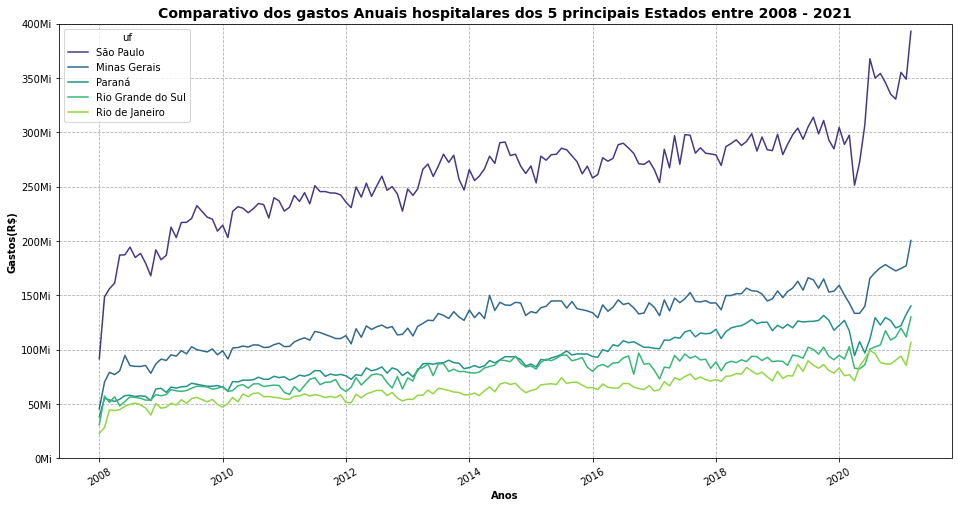

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#Criando a paleta
sns.set_palette(sns.color_palette("viridis", 5))
#criar a figura
ax=sns.lineplot(data=cinco_maiores_gastos,x='mes',y='gasto', hue ='uf')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares dos 5 principais Estados entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

# Aula 5 

Com nosso banco de dados não estruturado, irá ser comparado agora o gasto hospitalar ano a ano

In [ ]:
mensal_aberto.head()

,mes,uf,gasto
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12


Preciso criar colunas novas contendo o ano,  e uma cotendo apenas o mês

In [ ]:
mensal_aberto.dtypes

mes       object
uf        object
gasto    float64
dtype: object

percebe-se que a colunas mes está em objeto e para essa operação ela precisar estar como 'datetime64'

In [ ]:
mensal_aberto['mes']=mensal_aberto['mes'].astype('datetime64')

In [ ]:
mensal_aberto.dtypes

mes      datetime64[ns]
uf               object
gasto           float64
dtype: object

In [ ]:
mensal_aberto['mês'] = mensal_aberto['mes'].dt.month
mensal_aberto['ano'] = mensal_aberto['mes'].dt.year

In [ ]:
mensal_aberto['ano_mes_dia'] = mensal_aberto['mes']
mensal_aberto.drop('mes',axis=1,inplace=True)

In [ ]:
mensal_aberto

,uf,gasto,mês,ano,ano_mes_dia
0,São Paulo,91.68,1,2008,2008-01-01
1,São Paulo,148.68,2,2008,2008-02-01
2,São Paulo,156.09,3,2008,2008-03-01
3,São Paulo,161.23,4,2008,2008-04-01
4,São Paulo,187.12,5,2008,2008-05-01
...,...,...,...,...,...
4261,Amapá,2.22,11,2020,2020-11-01
4262,Amapá,2.57,12,2020,2020-12-01
4263,Amapá,2.80,1,2021,2021-01-01
4264,Amapá,2.82,2,2021,2021-02-01


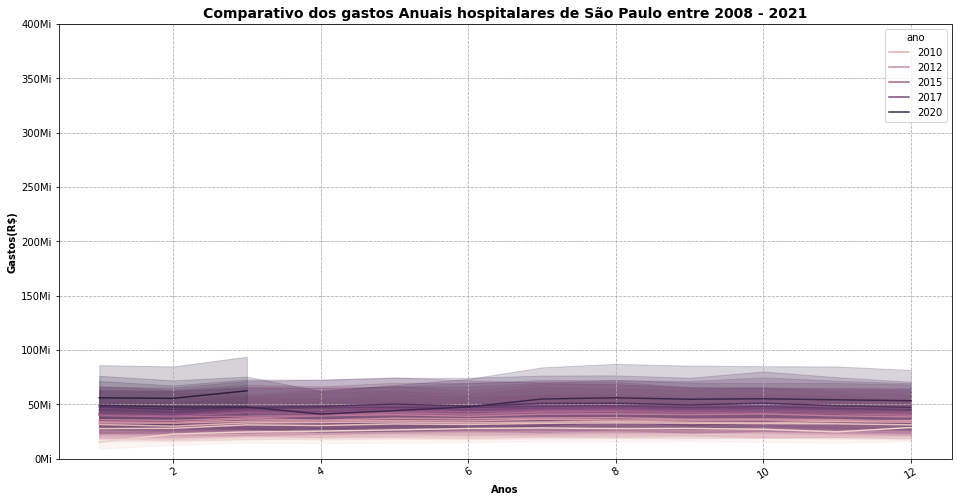

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto,x='mês',y='gasto',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Anos',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

Isso aconteceu pq, não foi especificado um Estado, mas todos. Usando o metodo query, pode-se selecionar todas as linhas onde o uf=='São Paulo'

In [ ]:
mensal_aberto.query("uf=='São Paulo'")

,uf,gasto,mês,ano,ano_mes_dia
0,São Paulo,91.68,1,2008,2008-01-01
1,São Paulo,148.68,2,2008,2008-02-01
2,São Paulo,156.09,3,2008,2008-03-01
3,São Paulo,161.23,4,2008,2008-04-01
4,São Paulo,187.12,5,2008,2008-05-01
...,...,...,...,...,...
153,São Paulo,335.08,11,2020,2020-11-01
154,São Paulo,330.49,12,2020,2020-12-01
155,São Paulo,355.15,1,2021,2021-01-01
156,São Paulo,348.83,2,2021,2021-02-01


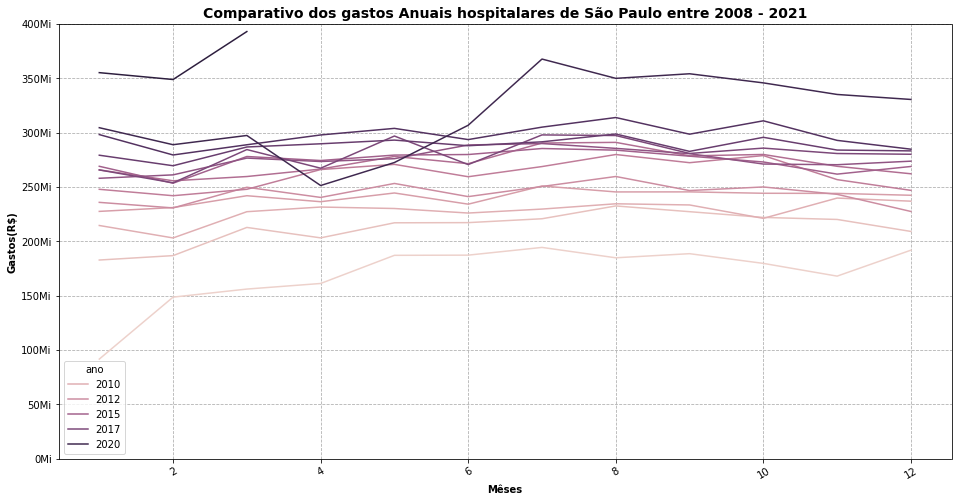

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"),x='mês',y='gasto',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,400)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Mêses',fontweight='bold')
plt.title('Comparativo dos gastos Anuais hospitalares de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

Esse gráfico conta a história de cada  mês, "será que todo mês de fevereiro ele tem um gasto maior ou menor?"

Podemos complexificar ainda mais a analise e dividir os meses pelos seus dias 

Fevereiro: 28

Janeiro: 30

Dezembro: 31

In [ ]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 30,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [ ]:
mensal_aberto['mês'].map(dias_por_mes)

0       31
1       28
2       31
3       30
4       31
        ..
4261    30
4262    31
4263    31
4264    28
4265    31
Name: mês, Length: 4266, dtype: int64

In [ ]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto']/mensal_aberto['mês'].map(dias_por_mes)

In [ ]:
mensal_aberto['gasto_diario']

0      2.96
1      5.31
2      5.04
3      5.37
4      6.04
       ... 
4261   0.07
4262   0.08
4263   0.09
4264   0.10
4265   0.10
Name: gasto_diario, Length: 4266, dtype: float64

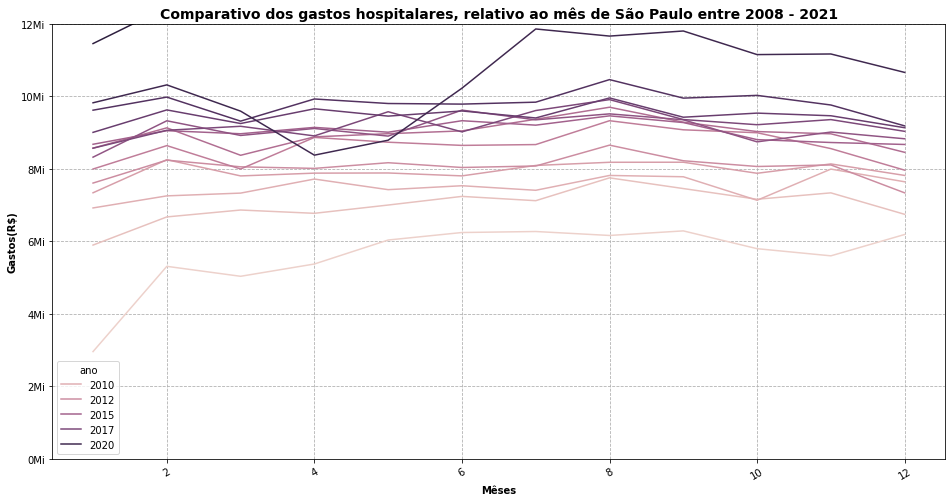

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"),x='mês',y='gasto_diario',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,12)
plt.xticks(rotation=30)

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Mêses',fontweight='bold')
plt.title('Comparativo dos gastos hospitalares, relativo ao mês de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

## Aula 5 - Desafio 1

Desafio 01: Melhorar o gráfico ano a ano:

Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

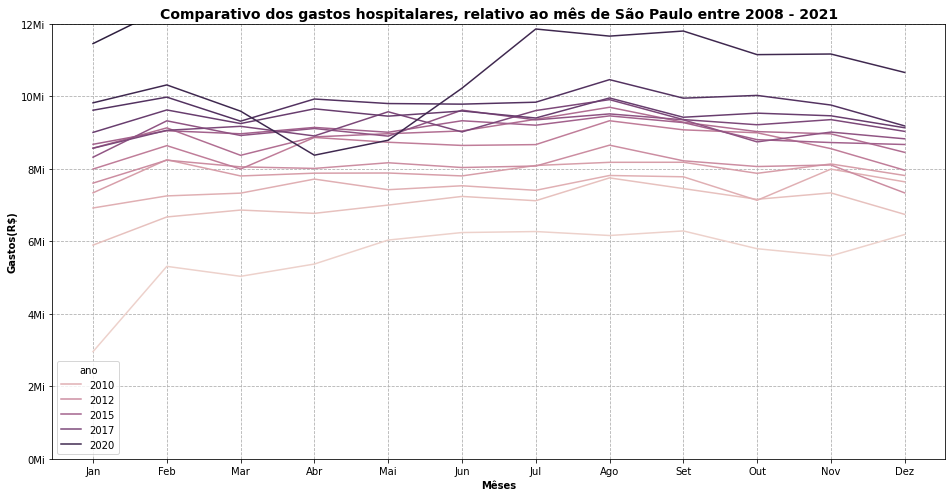

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"),x='mês',y='gasto_diario',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
plt.ylim(0,12)
#plt.xticks(rotation=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Abr','Mai' ,'Jun','Jul','Ago','Set','Out','Nov','Dez'])

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Mêses',fontweight='bold')
plt.title('Comparativo dos gastos hospitalares, relativo ao mês de São Paulo entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

## Aula 5 - Desafio 2

Desafio 02: Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

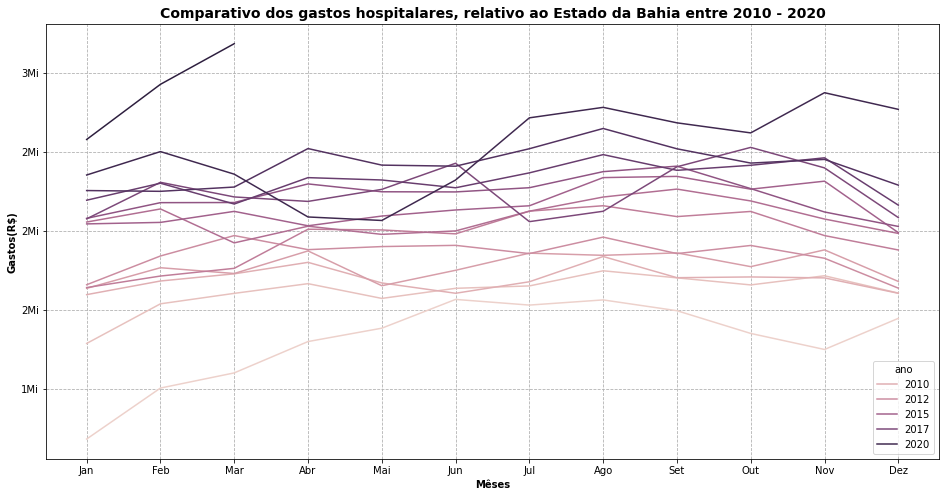

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto.query("uf=='Bahia'"),x='mês',y='gasto_diario',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
#plt.ylim(0,2)
#plt.xticks(rotation=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Abr','Mai' ,'Jun','Jul','Ago','Set','Out','Nov','Dez'])

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Mêses',fontweight='bold')
plt.title('Comparativo dos gastos hospitalares, relativo ao Estado da Bahia entre 2010 - 2020', fontsize=14,fontweight='bold')

plt.show()

No estado da Bahia percebe-se uma queda dos gastos de Maio e Junho, sendo que em 2012 e 2015 sido o seu pior momento e em 2010 e 2020 os anos onde a curva mais cresceu. A partir de  Agosto nota-se um comportamento de queda da curva, com alguns picos nos meses de Setembro e Novembro

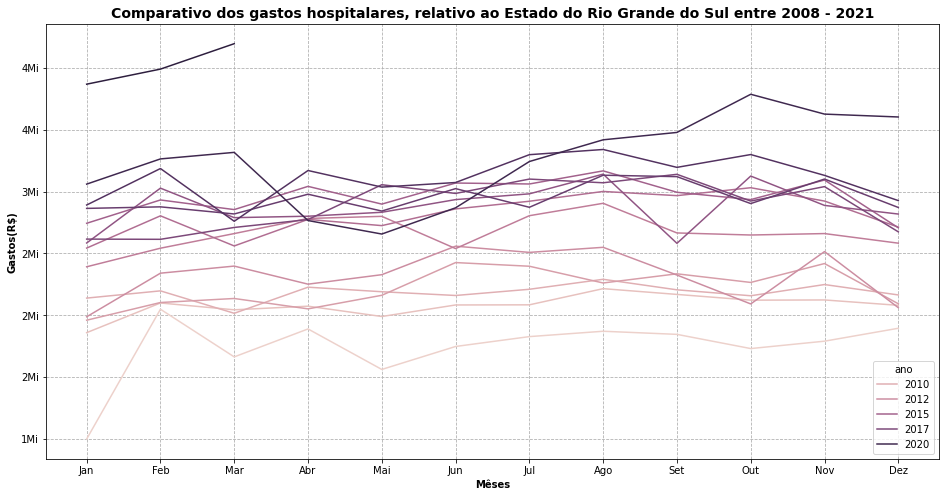

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style()
#criar a figura
ax=sns.lineplot(data=mensal_aberto.query("uf=='Rio Grande do Sul'"),x='mês',y='gasto_diario',hue='ano',color= 'goldenrod')

#Formatando os eixos
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"+'Mi'))
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
#plt.ylim(0,12)
#plt.xticks(rotation=30)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Abr','Mai' ,'Jun','Jul','Ago','Set','Out','Nov','Dez'])

#colocando grids
plt.grid(linestyle='--')

#Colocando os Titulos
plt.ylabel('Gastos(R$)', fontweight='bold')
plt.xlabel('Mêses',fontweight='bold')
plt.title('Comparativo dos gastos hospitalares, relativo ao Estado do Rio Grande do Sul entre 2008 - 2021', fontsize=14,fontweight='bold')

plt.show()

No estado do Rio Grande do Sul percebe-se uma queda dos gastos em Março, quando comparado com Fevereiro, nos ultimos anos 2017 - 2020 essa curva tendeu a oscilar entre um mês e outro do primeiro semestre (Jan - Jun). A partir de  Agosto de 2010 a curva permaneceu quase que em constante e nota-se que com excessão de 2020 esse mes é um periodo relativamente tranquilo para o Estado (com exceção de 2015) nota-se um comportamento de queda da curva, com alguns picos nos meses de Setembro e Novembro e uma queda em Dezembro.

Ambos os Estados possuem uma curva totalmente incomum e fora do padrão, relativa ao ano de 2020 nos meses de Abril - Ago. Onde a curva tendeu a cresccer e logo após oscilou nos meses restantes 

# Aula 6 

Criando um conjunto de dados por ano relativo ao estado de são paulo 

In [ ]:
estado_a_analisar = mensal_aberto.query("uf =='São Paulo'")
estado_a_analisar.head()

,uf,gasto,mês,ano,ano_mes_dia,gasto_diario
0,São Paulo,91.68,1,2008,2008-01-01,2.96
1,São Paulo,148.68,2,2008,2008-02-01,5.31
2,São Paulo,156.09,3,2008,2008-03-01,5.04
3,São Paulo,161.23,4,2008,2008-04-01,5.37
4,São Paulo,187.12,5,2008,2008-05-01,6.04


agrupando a soma de todos os anos

In [ ]:
gastos_por_ano_sp = estado_a_analisar.groupby('ano').sum()
gastos_por_ano_sp.head()

,gasto,mês,gasto_diario
ano,,,
2008,2039.52,78,67.26
2009,2324.35,69,76.56
2010,2728.18,78,89.96
2011,2888.08,78,95.26
2012,2928.50,78,96.59


Plotando um scattter plot

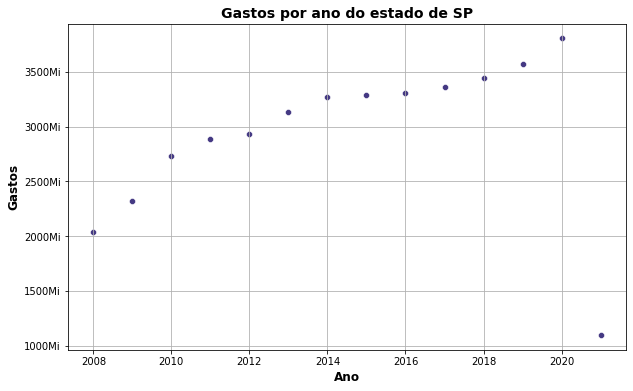

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.scatterplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#limite em y
plt.show()

Agora plotando um gráfico de linha

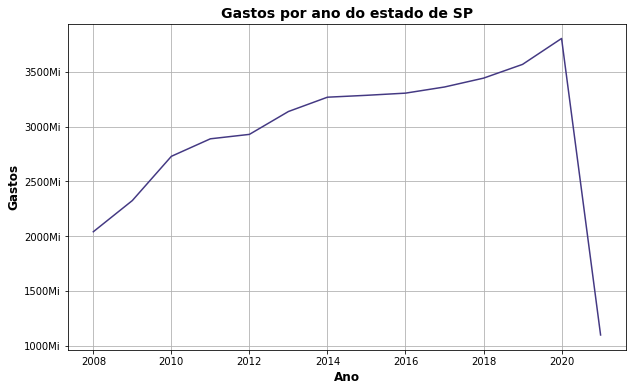

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lineplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#limite em y
plt.show()

Agora um gráfico de barras

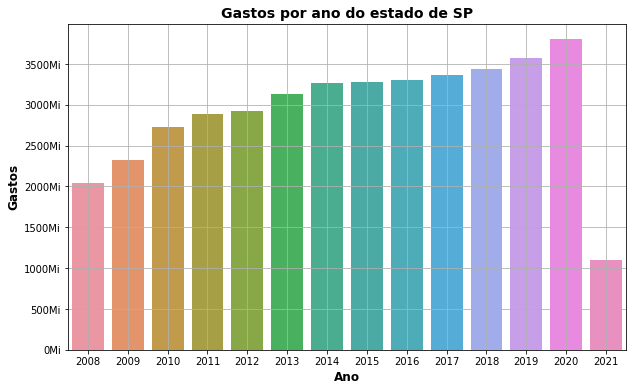

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#limite em y
plt.show()

O seaborn as vezes come o taamanho da barra para caber todos os anos

Nesses casos mudar uma palette de cor que seja um gradiente, pode ajudar nessa visualização sem complicar a observação dos usuários. A categoria discreta das palletes representam palletes que tenham valores

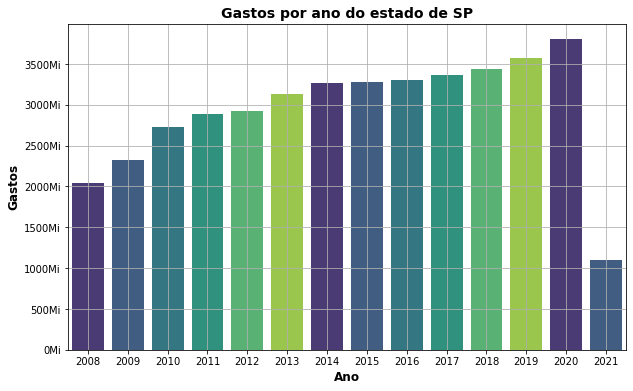

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto', palette=sns.color_palette("viridis"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#limite em y
plt.show()

Percebe-se que essa palette possui apenas 6 tons e a necessidade aqui é de 13 tons, basta adicionar isso no comando da palette 

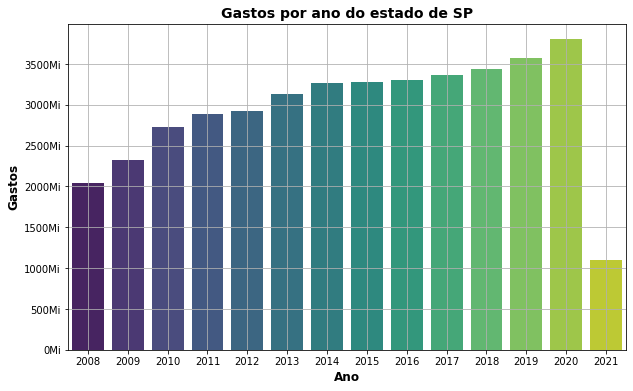

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto', palette=sns.color_palette("viridis",14))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

O que observa-se desse grpafico é que a cor está reforçando o crescimento do ano e não dos gastos, o crescimento anual é algo que o gráfico por si só ja demonstra. Entre 2014 e 2015 por exemplo não da para saber qual ano é maior, ordeando as cores por gasto ajudaria nisso Fica como desafio resolver isso 


In [ ]:
estados = ['São Paulo', 'Minas Gerais', 'Pernambuco']
por_ano_dos_estados= mensal_aberto.query('uf in @estados').groupby(["uf","ano"]).sum() #agrupando primeiro por estado e depois por ano (assim não corre risco dele agrupar estados diferentes)

In [ ]:
por_ano_dos_estados

gasto  mês  gasto_diario
uf           ano                            
Minas Gerais 2008  953.04   78         31.44
             2009 1063.05   69         35.02
             2010 1223.77   78         40.35
             2011 1321.73   78         43.59
             2012 1402.52   78         46.24
             2013 1517.97   78         50.05
             2014 1658.84   78         54.70
             2015 1674.94   78         55.25
             2016 1657.94   78         54.68
             2017 1718.54   78         56.67
             2018 1790.29   78         59.03
             2019 1889.16   78         62.30
             2020 1897.58   78         62.59
             2021  552.46    6         18.43
Pernambuco   2008  368.18   78         12.14
             2009  400.31   69         13.19
             2010  457.83   78         15.09
             2011  506.15   78         16.69
             2012  541.99   78         17.88
             2013  645.11   78         21.26
             2014  703.53   78         23.21
             2015  717.00   78         23.65
             2016  733.19   78         24.18
             2017  792.20   78         26.12
             2018  800.66   78         26.39
             2019  819.74   78         27.03
             2020  814.04   78         26.85
             2021  243.28    6          8.11
São Paulo    2008 2039.52   78         67.26
             2009 2324.35   69         76.56
             2010 2728.18   78         89.96
             2011 2888.08   78         95.26
             2012 2928.50   78         96.59
             2013 3137.33   78        103.48
             2014 3268.01   78        107.78
             2015 3285.22   78        108.33
             2016 3305.06   78        109.02
             2017 3361.18   78        110.80
             2018 3442.01   78        113.52
             2019 3567.64   78        117.66
             2020 3804.31   78        125.44
             2021 1096.92    6         36.59

resetando o index do DataFrame

In [ ]:
por_ano_dos_estados = por_ano_dos_estados.reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mês,gasto_diario
0,Minas Gerais,2008,953.04,78,31.44
1,Minas Gerais,2009,1063.05,69,35.02
2,Minas Gerais,2010,1223.77,78,40.35
3,Minas Gerais,2011,1321.73,78,43.59
4,Minas Gerais,2012,1402.52,78,46.24


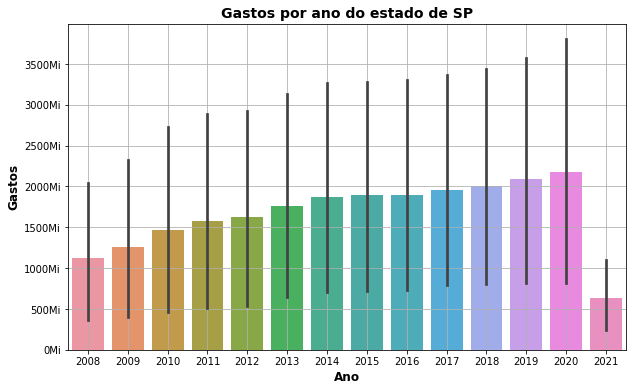

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=por_ano_dos_estados,x='ano',y='gasto')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

Ele criou aqui intervalos de confiânça, ja que em um ano ele possui três valores de estados distintos


A palette nesse caso tbm pode ajudar na identificação de cada estado

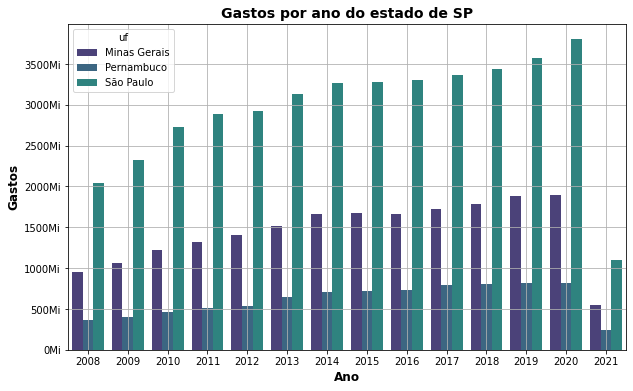

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=por_ano_dos_estados,x='ano',y='gasto', hue='uf')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

Nesse gráfico ja consegue-se absorver algumas informações, mas uma opção mais viável seria a plotagem de categoria 

o catplot

<Figure size 720x432 with 0 Axes>

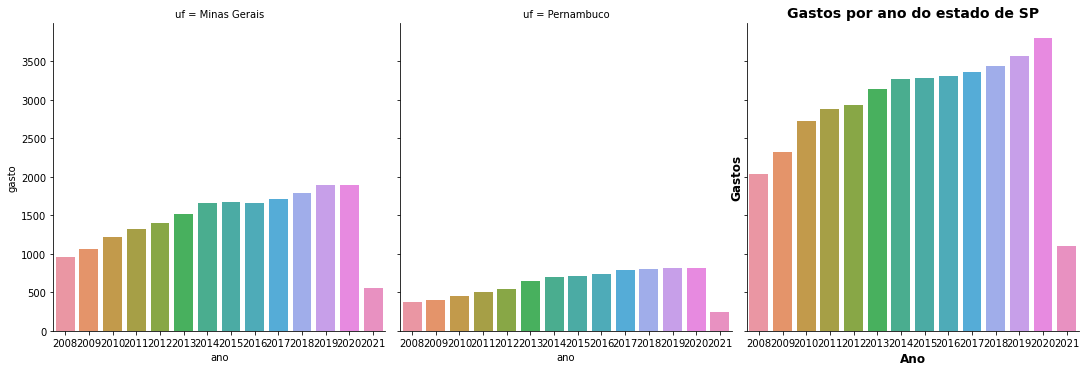

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.catplot(data=por_ano_dos_estados,x='ano',y='gasto', kind ='bar', col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

O que aprendemos nessa aula:

Como usar o Groupby;
Como alterar a Palete de cores do seu gráfico com seaborn;
Como usar a Palete de cores para ajudar na interpretação dos gráficos;
O que é e como usar o catplot para comparar categorias.

## Aula 6 - Desafio 1 

Ordenando pelo valor de y

Preciso entender :

https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot

In [ ]:
gastos_por_ano_sp.index

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='ano')

In [ ]:
import numpy as np

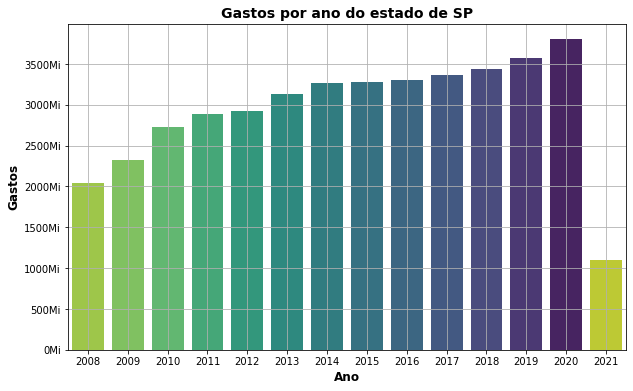

In [ ]:
plt.figure(figsize=(10,6))

data = gastos_por_ano_sp['gasto']
pal=sns.color_palette("viridis",len(data))
rank = data.argsort().argsort()
ax = sns.barplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto', palette=np.array(pal[::-1])[rank])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

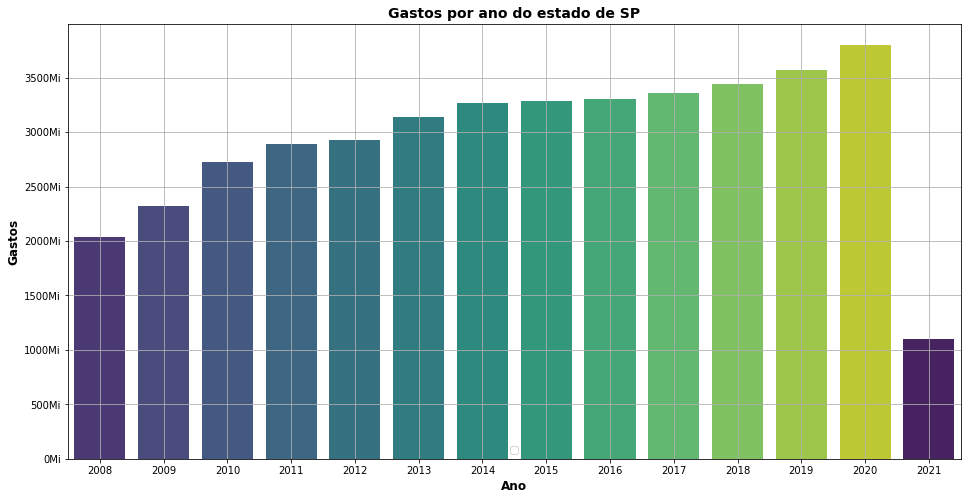

In [ ]:
plt.figure(figsize=(16,8))

ax = sns.barplot(data=gastos_por_ano_sp,x=gastos_por_ano_sp.index,y='gasto',hue='gasto',dodge=False, palette=sns.color_palette("viridis",14))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
plt.grid('--')
plt.legend('')

#tom de cor ordenado por valor
#limite em y
plt.show()

É possivel observar por esse gráfico que o ano de 2015 possui menos gastos que o de 2016 e mais gastos que 2014

## Aula 6 - Desafio 02

Desafio 02: Explorar a documentação do Seaborn.

Explorando a documentação do Seaborn podemos encontrar alguns tipos de gráficos como:

 * **relplot** - Interface que desenha plots relacionais e abrange os scatterplots e os lineplots
 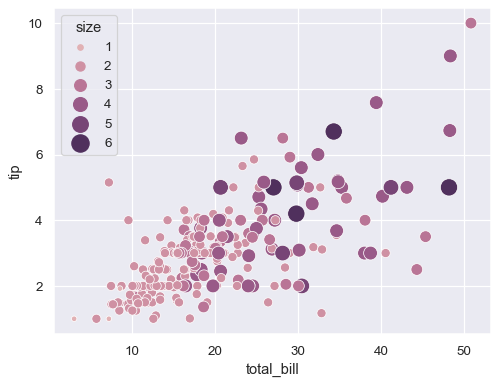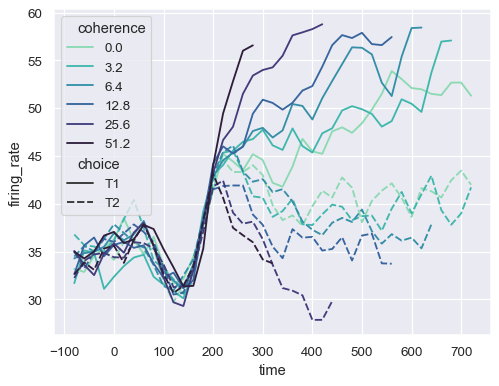

* **displot**:  Interface que desenha plots de destribuição e abrange os histplots e os ruglots,distplot dentre outros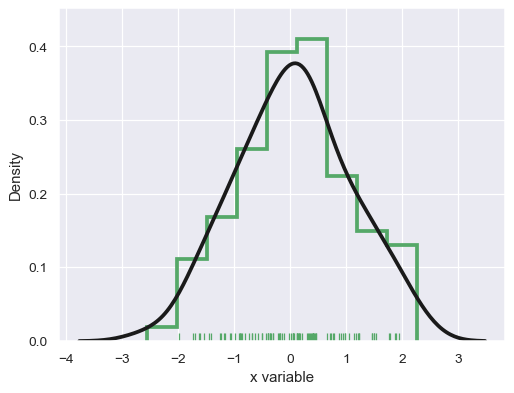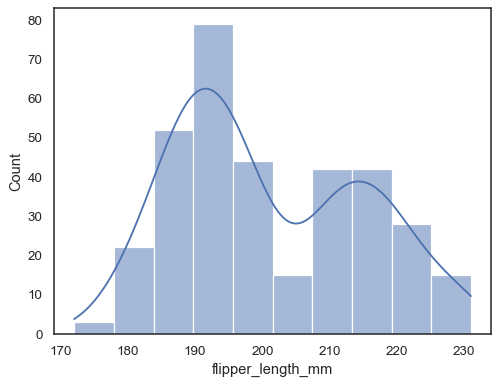

* **catplot:** Interface que desenha plots de categoria e abrange os stripplots,swarmplot,violinplot,boxenplot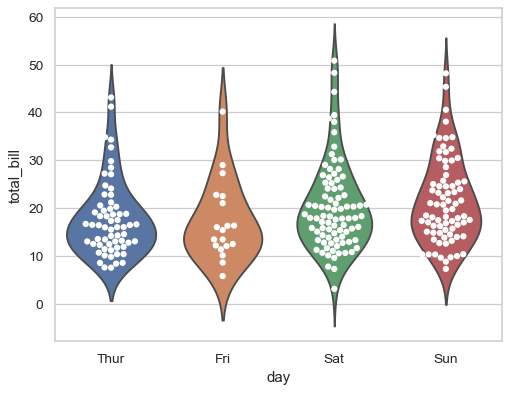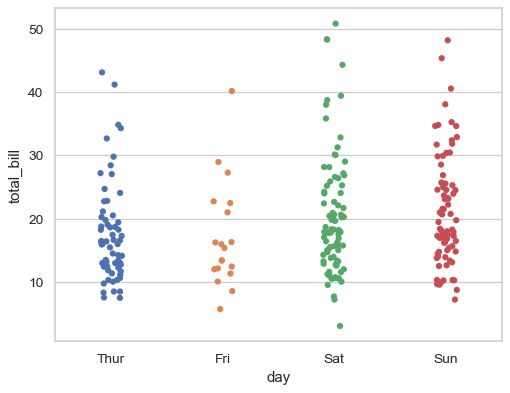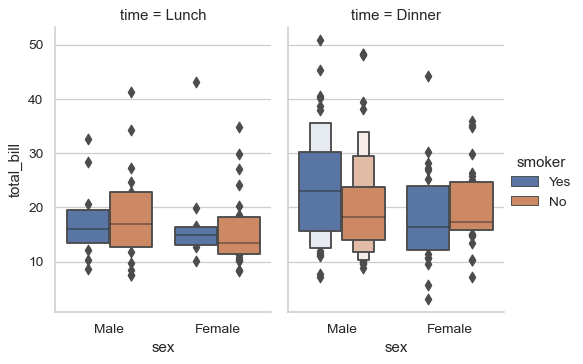 dentre outros.

* **regressionplots:** São gráficos que se propõem a desenhar a regressão e se dividem em: lmplot,regplot,residplot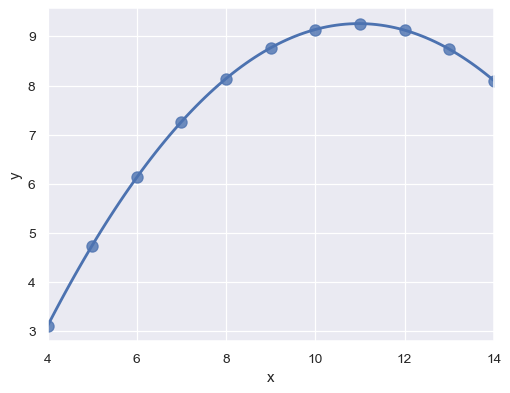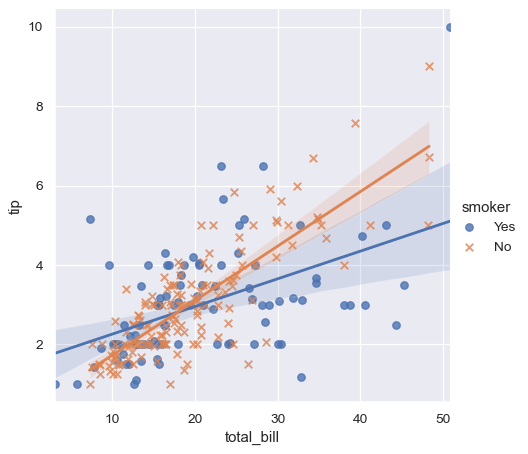

**Abaixo alguns exemplos de plots do seaborn**

## Aula 6 - Desafio 03: 

Desafio 03: Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.


Catplot, kind=strip

<Figure size 720x432 with 0 Axes>

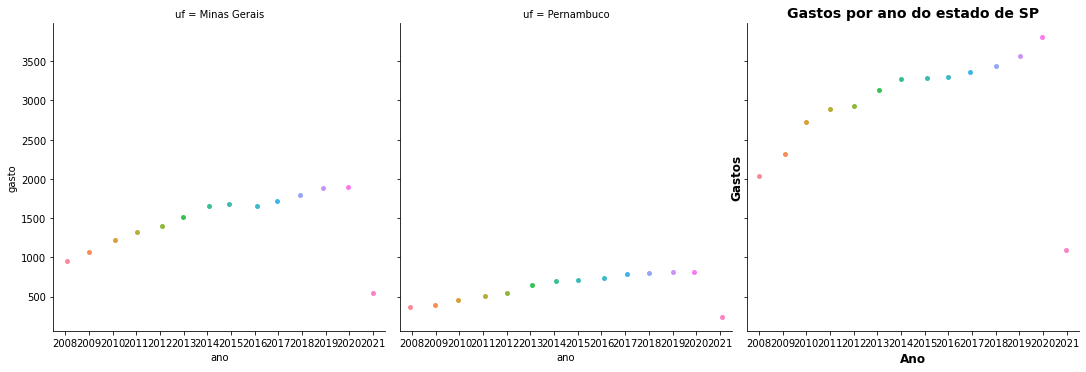

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.catplot(data=por_ano_dos_estados,x='ano',y='gasto', kind ='strip', col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

Catplot, kind=swarm

<Figure size 720x432 with 0 Axes>

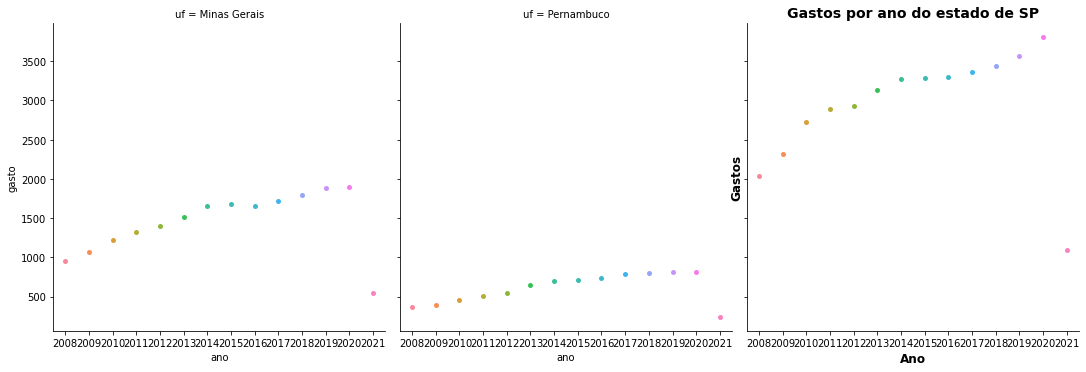

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.catplot(data=por_ano_dos_estados,x='ano',y='gasto', kind ='swarm', col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

Catplot, kind=violin

<Figure size 720x432 with 0 Axes>

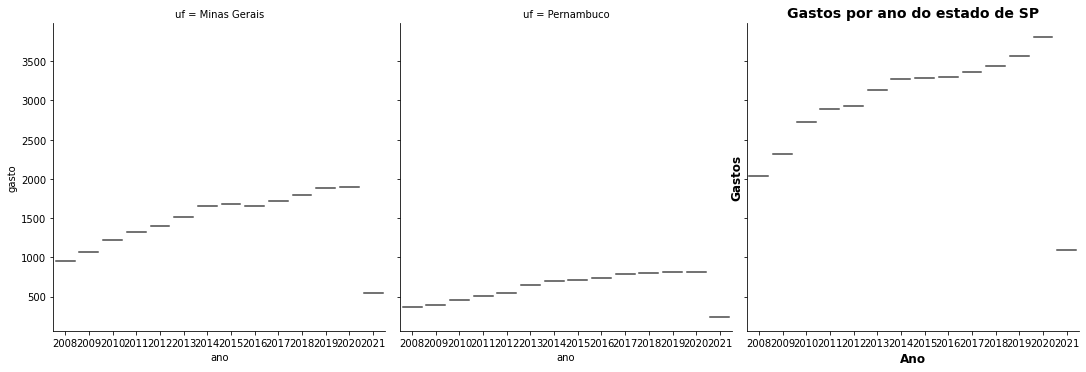

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.catplot(data=por_ano_dos_estados,x='ano',y='gasto', kind ='violin', col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

relplot, kind=line

<Figure size 720x432 with 0 Axes>

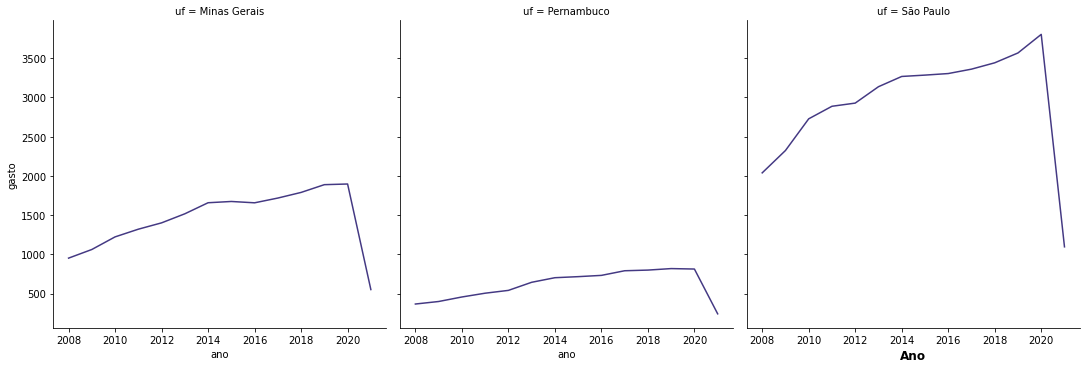

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.relplot(data=por_ano_dos_estados,x='ano',y='gasto', kind ='line', col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

displot, kind=hist

<Figure size 720x432 with 0 Axes>

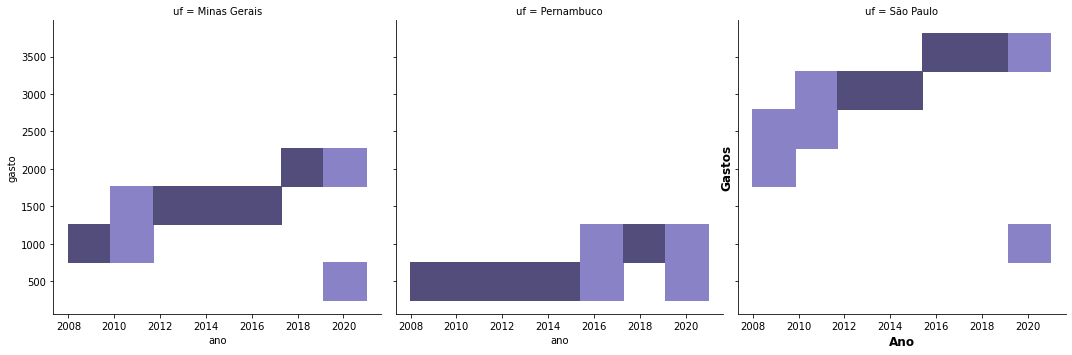

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.displot(data=por_ano_dos_estados,x='ano',y='gasto', kind='hist',col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

displot,kind=kde

<Figure size 720x432 with 0 Axes>

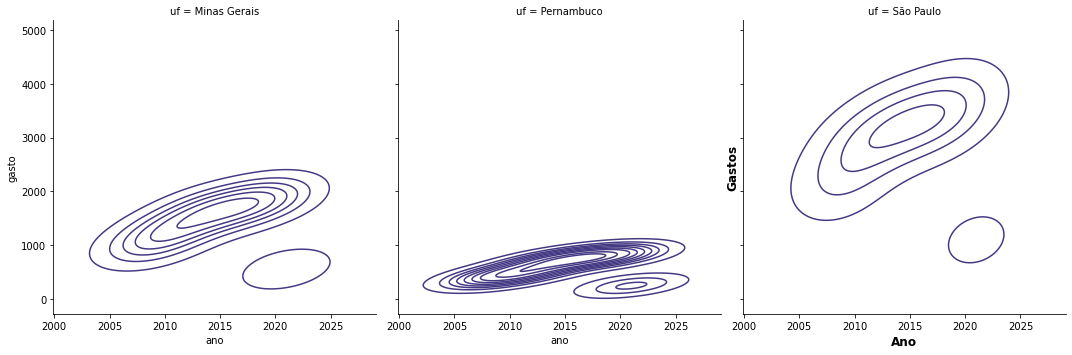

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.displot(data=por_ano_dos_estados,x='ano',y='gasto', kind='kde',col='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

lmplot

<Figure size 720x432 with 0 Axes>

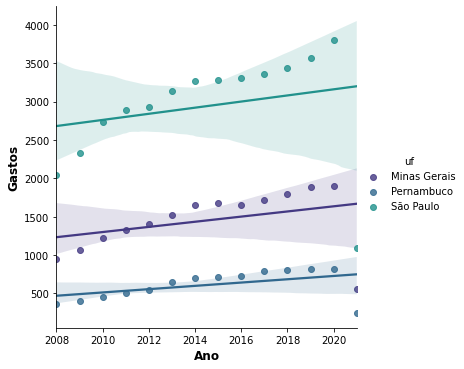

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.lmplot(data=por_ano_dos_estados,x='ano',y='gasto', hue='uf')
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"+"Mi"))
#plt.title('Gastos por ano do estado de SP', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Gastos', fontsize=12, fontweight='bold')
#plt.grid('--')

#tom de cor ordenado por valor
#limite em y
plt.show()

## Aula 6 -  Desafio 04 

Desafio 04: Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula. (SUPER DESAFIO)